<a href="https://colab.research.google.com/github/pedroafleite/instacart-market-basket-analysis/blob/main/instacart_3_feat_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans

sns.set()

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/instacart/df.csv')
data.head(10)

Mounted at /content/drive


,order_id,product_id,product_name,aisle_id,department_id,user_id,Categories,Category 1,Category 3,Category 2,Category 0,Category 4
0,1,49302,Bulgarian Yogurt,120,16,112108,1,1,0,0,0,0
1,1,11109,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,3,0,1,0,0,0
2,1,10246,Organic Celery Hearts,83,4,112108,2,0,0,1,0,0
3,1,49683,Cucumber Kirby,83,4,112108,0,0,0,0,1,0
4,1,43633,Lightly Smoked Sardines in Olive Oil,95,15,112108,4,0,0,0,0,1
5,1,13176,Bag of Organic Bananas,24,4,112108,4,0,0,0,0,1
6,1,47209,Organic Hass Avocado,24,4,112108,0,0,0,0,1,0
7,1,22035,Organic Whole String Cheese,21,16,112108,1,1,0,0,0,0
8,36,39612,Grated Pecorino Romano Cheese,2,16,79431,3,0,1,0,0,0
9,36,19660,Spring Water,115,7,79431,1,1,0,0,0,0


In [2]:
aisles = pd.read_csv('/content/drive/MyDrive/instacart/aisles.csv')
df = data.merge(aisles, how='inner')
df.columns

Index(['order_id', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'user_id', 'Categories', 'Category 1', 'Category 3', 'Category 2',
       'Category 0', 'Category 4', 'aisle'],
      dtype='object')

In [3]:
df0=df.loc[df['Categories']==0]
df1=df.loc[df['Categories']==1]
df2=df.loc[df['Categories']==2]
df3=df.loc[df['Categories']==3]
df4=df.loc[df['Categories']==4]

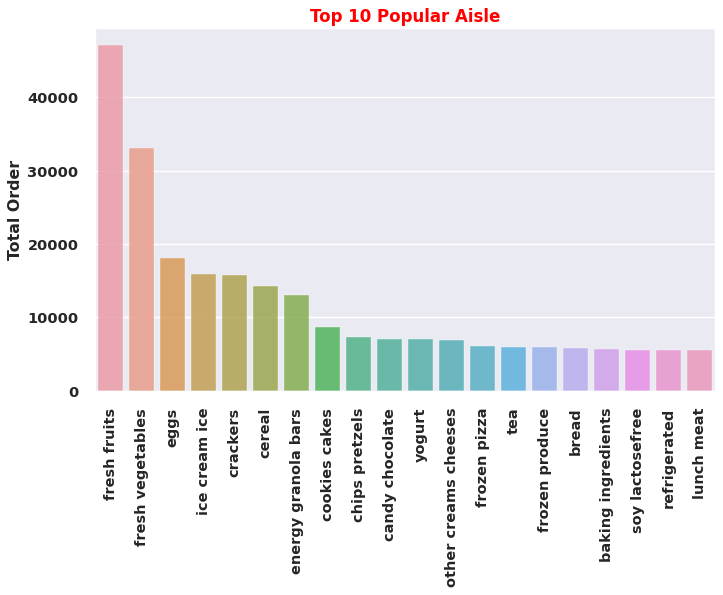

In [4]:
#Most Popular Aisle on Category 0 (Top 10)
plt.figure(figsize=(10,6),dpi=80),
plt.style.use('seaborn-talk')
popular_aisle = df0['aisle'].value_counts().head(20)
sns.barplot(popular_aisle.index, popular_aisle.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.title("Top 10 Popular Aisle", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Order",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

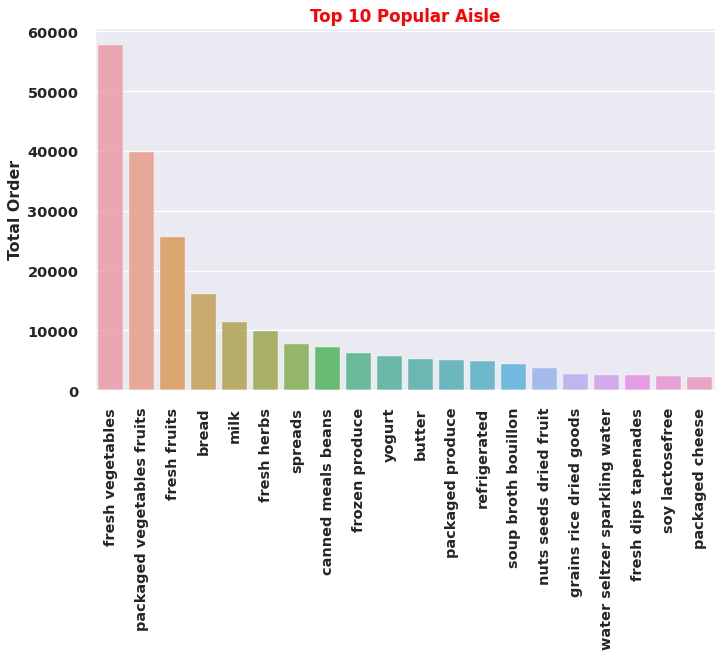

In [5]:
#Most Popular Aisle on Category 1 (Top 10)
plt.figure(figsize=(10,6),dpi=80),
plt.style.use('seaborn-talk')
popular_aisle = df1['aisle'].value_counts().head(20)
sns.barplot(popular_aisle.index, popular_aisle.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.title("Top 10 Popular Aisle", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Order",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

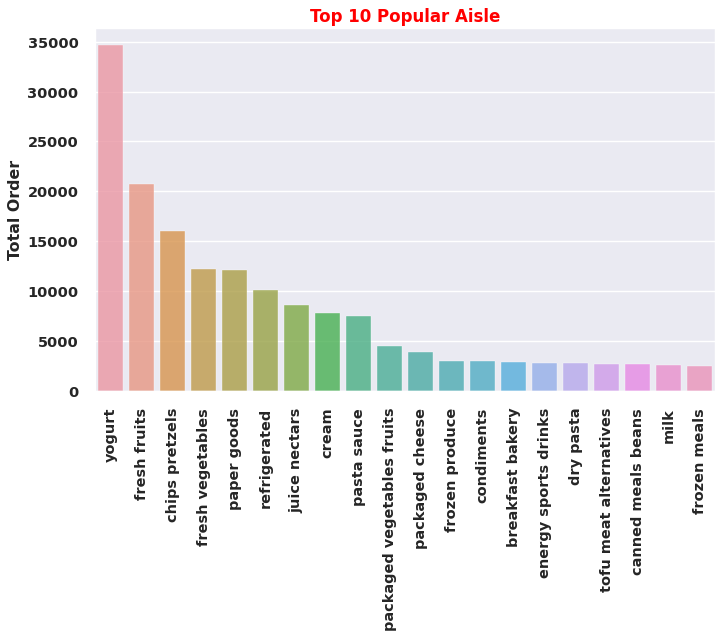

In [6]:
#Most Popular Aisle on Category 2 (Top 10)
plt.figure(figsize=(10,6),dpi=80),
plt.style.use('seaborn-talk')
popular_aisle = df2['aisle'].value_counts().head(20)
sns.barplot(popular_aisle.index, popular_aisle.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.title("Top 10 Popular Aisle", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Order",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

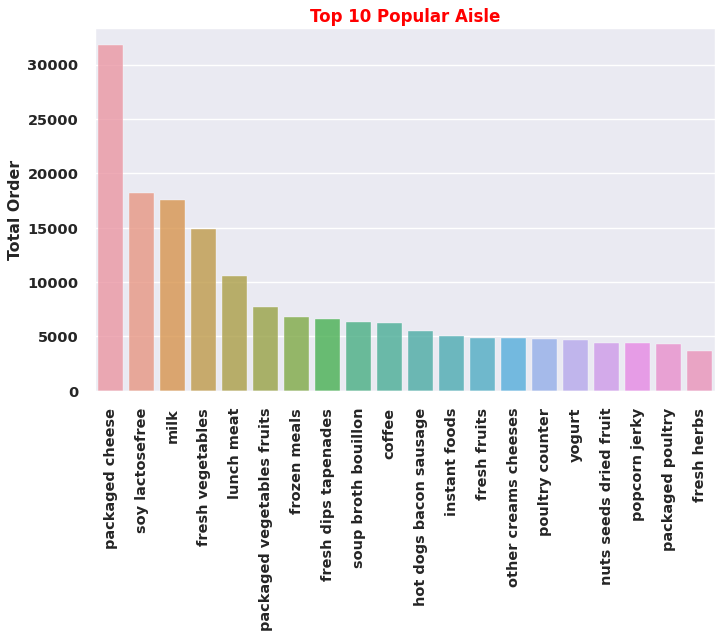

In [7]:
#Most Popular Aisle on Category 3 (Top 10)
plt.figure(figsize=(10,6),dpi=80),
plt.style.use('seaborn-talk')
popular_aisle = df3['aisle'].value_counts().head(20)
sns.barplot(popular_aisle.index, popular_aisle.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.title("Top 10 Popular Aisle", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Order",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

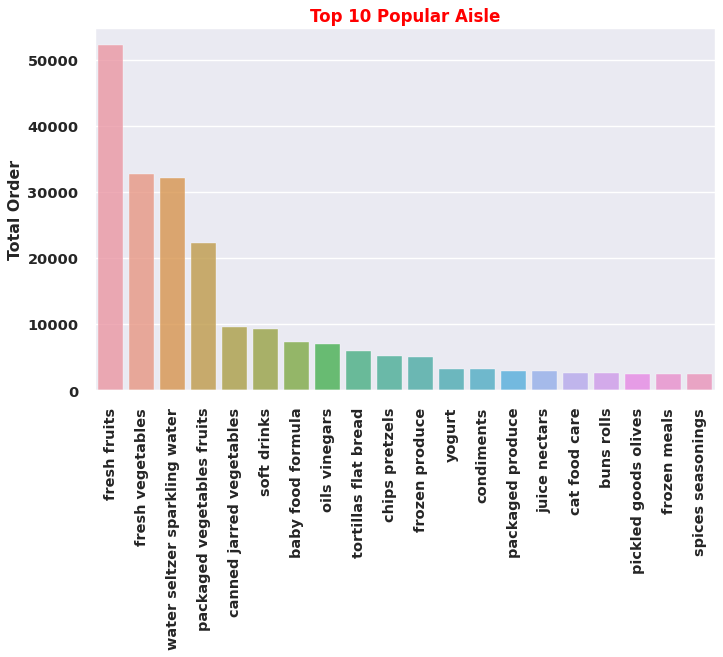

In [8]:
#Most Popular Aisle on Category 4 (Top 10)
plt.figure(figsize=(10,6),dpi=80),
plt.style.use('seaborn-talk')
popular_aisle = df4['aisle'].value_counts().head(20)
sns.barplot(popular_aisle.index, popular_aisle.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.title("Top 10 Popular Aisle", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Order",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

In [9]:
data.columns

Index(['order_id', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'user_id', 'Categories', 'Category 1', 'Category 3', 'Category 2',
       'Category 0', 'Category 4'],
      dtype='object')

In [10]:
data["order_id01"] = data["order_id"].copy()
#data["user_id01"] = data["user_id"].copy()

In [11]:
df['user_id'].nunique()

131209

In [12]:
df['order_id'].nunique()

131209

# **Feature Engineering**

In [13]:
gb = data.groupby("user_id")
df_customers = []

# Number of orders of each user
nbr_orders = (gb["order_id01"].unique()).apply(lambda x: len(x))
df_customers.append(nbr_orders)

# Average number of different products purchased per order
df_customers.append(gb["order_id"].count()/nbr_orders)

# Proportion of products purchased belonging to one of the 5 categories for each client
for category in ["Category 0", "Category 1", "Category 2", "Category 3", "Category 4"]:
    df_customers.append(gb[category].mean())

In [14]:
df_customers = pd.DataFrame(df_customers).T
df_customers.rename(columns = {'order_id01':'Count_Orders', 
                               'Unnamed 0':'Average_Products_Order',
                               'Category 0':'Fruits & Vegs', 
                               'Category 1':'Vegs & Fruits',
                               'Category 2':'Yogurt & Fruits',
                               'Category 3':'Cheese & Soy',
                               'Category 4':'Fruits & Water'},
                    inplace = True)
df_customers.head(10)

,Count_Orders,Average_Products_Order,Fruits & Vegs,Vegs & Fruits,Yogurt & Fruits,Cheese & Soy,Fruits & Water
user_id,,,,,,,
1,1.0,11.0,0.181818,0.181818,0.272727,0.272727,0.090909
2,1.0,31.0,0.387097,0.193548,0.096774,0.193548,0.129032
5,1.0,9.0,0.222222,0.222222,0.111111,0.222222,0.222222
7,1.0,9.0,0.555556,0.111111,0.000000,0.111111,0.222222
8,1.0,18.0,0.222222,0.388889,0.111111,0.055556,0.222222
9,1.0,22.0,0.363636,0.090909,0.227273,0.136364,0.181818
10,1.0,4.0,0.000000,0.250000,0.000000,0.250000,0.500000
13,1.0,5.0,0.200000,0.200000,0.400000,0.200000,0.000000
14,1.0,11.0,0.090909,0.000000,0.363636,0.090909,0.454545


In [15]:
df_customers = df_customers.reset_index(level=0, drop=True)

In [16]:
df_customers.head(10)

,Count_Orders,Average_Products_Order,Fruits & Vegs,Vegs & Fruits,Yogurt & Fruits,Cheese & Soy,Fruits & Water
0,1.0,11.0,0.181818,0.181818,0.272727,0.272727,0.090909
1,1.0,31.0,0.387097,0.193548,0.096774,0.193548,0.129032
2,1.0,9.0,0.222222,0.222222,0.111111,0.222222,0.222222
3,1.0,9.0,0.555556,0.111111,0.000000,0.111111,0.222222
4,1.0,18.0,0.222222,0.388889,0.111111,0.055556,0.222222
5,1.0,22.0,0.363636,0.090909,0.227273,0.136364,0.181818
6,1.0,4.0,0.000000,0.250000,0.000000,0.250000,0.500000
7,1.0,5.0,0.200000,0.200000,0.400000,0.200000,0.000000
8,1.0,11.0,0.090909,0.000000,0.363636,0.090909,0.454545
9,1.0,6.0,0.166667,0.333333,0.500000,0.000000,0.000000


In [17]:
# Noisy points
# Fix that list range
#df_customers.drop([0, 3008], axis=0, inplace=True)

In [18]:
df_customers.columns

Index(['Count_Orders', 'Average_Products_Order', 'Fruits & Vegs',
       'Vegs & Fruits', 'Yogurt & Fruits', 'Cheese & Soy', 'Fruits & Water'],
      dtype='object')

# **Clustering**

In [19]:
len(df_customers)

131209

In [20]:
# Yield successive n-sized 
# chunks from l. 
def divide_chunks(l, n): 
      
    # looping till length l 
    for i in range(0, len(l), n):  
        yield l[i:i + n]

# How many elements each 
# list should have 
n = int(len(df_customers)/2)
  
x = list(divide_chunks(df_customers, n)) 

In [21]:
df_customers = x[0]
len(df_customers)

65604

In [22]:
# Standization of the data

stscaler = StandardScaler().fit(df_customers)
df_standard = stscaler.transform(df_customers)

In [27]:
# Example of a DBCAN model (Density-Based Spatial Clustering of Applications with Noise)
# https://elutins.medium.com/dbscan-what-is-it-when-to-use-it-how-to-use-it-8bd506293818

# Decrease eps, increase clusters. Increase eps, decrease clusters.

dbsc = DBSCAN(eps=1.2, min_samples=30).fit(df_standard)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[dbsc.core_sample_indices_] = True
dbsc.get_params()

{'algorithm': 'auto',
 'eps': 1.2,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 30,
 'n_jobs': None,
 'p': None}

In [28]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Number of Clusters: %d" % n_clusters_)
print("Number of noises: %d" % n_noise_)

Number of Clusters: 1
Number of noises: 4


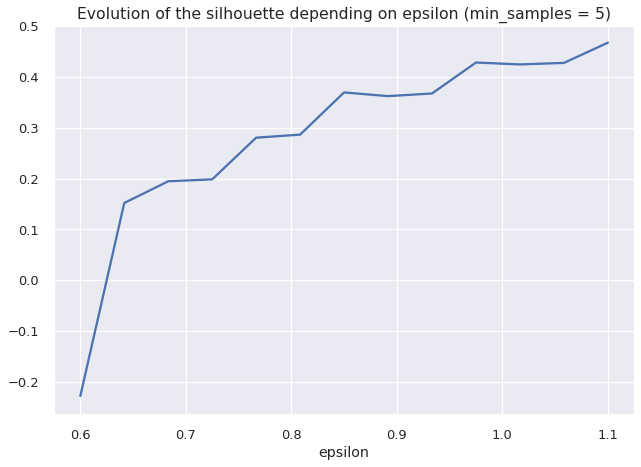

,Epsilon,Nbr_Clusters,Nbr_noises,Silhouette,Distribution of points
0,0.600000,45,162,-0.227355,"[55006, 57, 1448, 1259, 54, 635, 722, 110, 56,..."
1,0.641667,14,108,0.151893,"[58837, 1448, 1259, 722, 366, 665, 651, 571, 2..."
2,0.683333,10,68,0.194601,"[61203, 1259, 722, 366, 665, 651, 97, 486, 64,..."
3,0.725000,7,42,0.198350,"[62854, 722, 665, 651, 97, 486, 87]"
4,0.766667,5,24,0.280270,"[63455, 722, 665, 651, 87]"
5,0.808333,5,19,0.286232,"[63460, 722, 665, 651, 87]"
6,0.850000,4,11,0.369146,"[63555, 722, 665, 651]"
7,0.891667,4,10,0.361892,"[63556, 722, 665, 651]"
8,0.933333,4,9,0.367066,"[63557, 722, 665, 651]"
9,0.975000,2,8,0.427897,"[64874, 722]"


In [38]:
# vary the value of epsilon between 0.6 and 1.1 for min_samples = 5

epsilon = np.linspace(0.6,1.1,13)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    
    dbsc = DBSCAN(eps=k, min_samples=5).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype=bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)

# Dataframe with Number of clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon

df_dbsc5 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                         'Nbr_noises':noise, 'Silhouette':res,
                         'Distribution of points': n_points_epsilon})
    
#graph showing the evolution of the silhouette depending on epsilon (min_samples = 5)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 5)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc5.head(13)

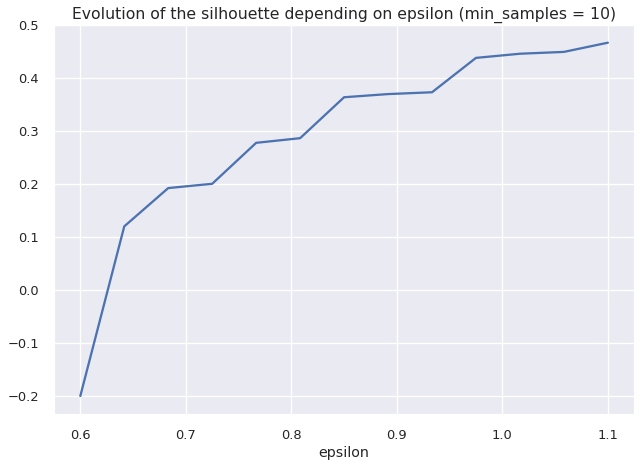

,Epsilon,Nbr_Clusters,Nbr_noises,Silhouette,Distribution of points
0,0.600000,53,262,-0.200384,"[53254, 57, 1448, 1259, 54, 791, 635, 722, 110..."
1,0.641667,18,166,0.120016,"[58124, 1448, 1259, 722, 366, 665, 651, 523, 6..."
2,0.683333,10,111,0.192316,"[61161, 1259, 722, 366, 665, 651, 97, 485, 64,..."
3,0.725000,7,72,0.200418,"[62824, 722, 665, 651, 97, 486, 87]"
4,0.766667,5,53,0.277770,"[63426, 722, 665, 651, 87]"
5,0.808333,5,26,0.286561,"[63453, 722, 665, 651, 87]"
6,0.850000,4,14,0.363844,"[63552, 722, 665, 651]"
7,0.891667,4,12,0.369826,"[63554, 722, 665, 651]"
8,0.933333,4,10,0.373255,"[63556, 722, 665, 651]"
9,0.975000,2,9,0.438197,"[64873, 722]"


In [47]:
# vary the value of epsilon between 0.6 and 1.1 for min_samples = 10

epsilon = np.linspace(0.6,1.1,13)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    
    dbsc = DBSCAN(eps=k, min_samples=10).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype=bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)

# Dataframe with Number of clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon

df_dbsc5 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                         'Nbr_noises':noise, 'Silhouette':res,
                         'Distribution of points': n_points_epsilon})
    
#graph showing the evolution of the silhouette depending on epsilon (min_samples = 10)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 10)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc5.head(13)

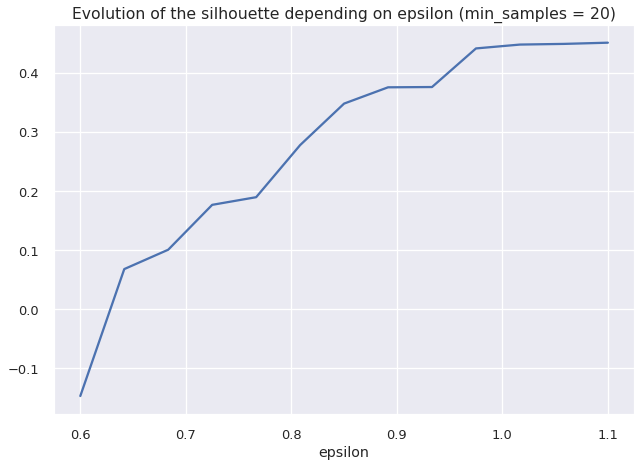

,Epsilon,Nbr_Clusters,Nbr_noises,Silhouette,Distribution of points
0,0.600000,74,737,-0.146683,"[50023, 57, 1448, 1259, 74, 67, 106, 1003, 54,..."
1,0.641667,27,404,0.068356,"[57153, 1448, 1259, 634, 722, 86, 665, 651, 25..."
2,0.683333,21,206,0.101156,"[57400, 1448, 1259, 634, 722, 111, 665, 651, 2..."
3,0.725000,12,121,0.177162,"[60873, 1260, 722, 111, 665, 651, 255, 189, 88..."
4,0.766667,10,77,0.190118,"[61502, 1259, 722, 110, 665, 651, 255, 188, 88..."
5,0.808333,6,48,0.278346,"[62172, 1259, 722, 665, 651, 87]"
6,0.850000,5,35,0.348655,"[62272, 1259, 722, 665, 651]"
7,0.891667,4,25,0.376234,"[63541, 722, 665, 651]"
8,0.933333,4,17,0.376705,"[63549, 722, 665, 651]"
9,0.975000,2,16,0.442091,"[64866, 722]"


In [48]:
# vary the value of epsilon between 0.6 and 1.1 for min_samples = 20

epsilon = np.linspace(0.6,1.1,13)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    
    dbsc = DBSCAN(eps=k, min_samples=20).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype=bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)

# Dataframe with Number of clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon

df_dbsc5 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                         'Nbr_noises':noise, 'Silhouette':res,
                         'Distribution of points': n_points_epsilon})
    
#graph showing the evolution of the silhouette depending on epsilon (min_samples = 20)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 20)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc5.head(13)

In [ ]:
# vary the value of epsilon between 0.6 and 1.2 for min_samples = 30
epsilon = np.linspace(0.6,1.2,16)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    
    dbsc = DBSCAN(eps=k, min_samples=30).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype=bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)
    
# Dataframe with Nbr_Clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon

df_dbsc30 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                          'Nbr_noises':noise, 'Silhouette':res,
                         'Distribution of points': n_points_epsilon})
# Graph showing the evolution of the silhouette depending on epsilon (min_samples = 30)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 30)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc30.head(16)

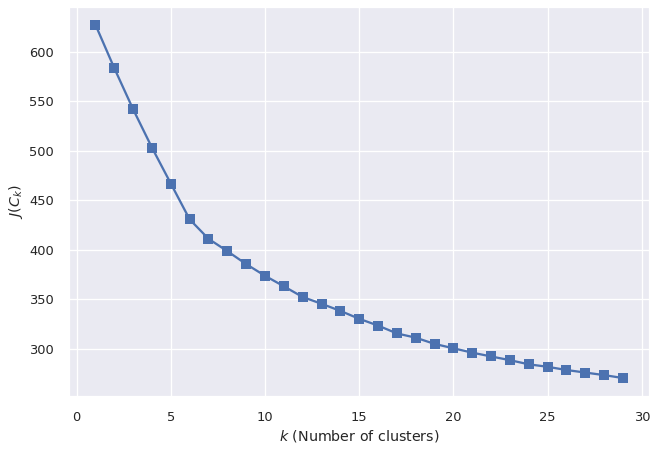

In [29]:
# Graph showing the evolution of the square root of the sum of squared distances
# of samples to their closest cluster center, depending on number of cluster (k)

inertia = []

for k in range(1,30):
    model = KMeans(n_clusters=k, random_state=0).fit(df_standard)
    inertia.append(np.sqrt(model.inertia_))
    
plt.plot(range(1, 30), inertia, marker='s');
plt.xlabel('$k$ (Number of clusters)')
plt.ylabel('$J(C_k)$');

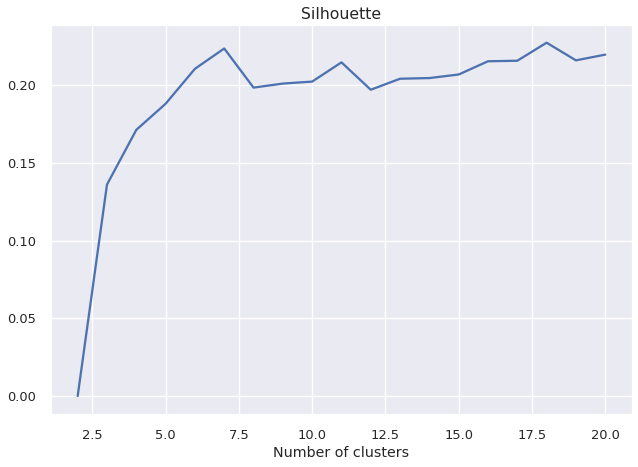

In [30]:
# Vary the number of clusters between 2 and 20
res =  np.arange(19,dtype="double")

for k in np.arange(1,19):
    km = KMeans(n_clusters=k+1, random_state=0).fit(df_standard)
    res[k] = metrics.silhouette_score(df_standard,km.labels_)
    
#graph

plt.title("Silhouette")
plt.xlabel("Number of clusters")
plt.plot(np.arange(2,21,1),res)
plt.show()

In [31]:
#Clustering with K-means algorithm

for n_cluster in [3,4,5,6,7,8,9,12,13]:
    model = KMeans(n_clusters=n_cluster, random_state=0).fit(df_standard)
    idk = model.labels_
    dict_nbr_points = {j: ("Number of points = %d" % (len(np.where(idk == j)[0])))
                       for j in range(model.n_clusters)}
    print('Number of clusters: %d' % n_cluster)
    print(dict_nbr_points)
    print('------------------------')

Number of clusters: 3
{0: 'Number of points = 34125', 1: 'Number of points = 21027', 2: 'Number of points = 10452'}
------------------------
Number of clusters: 4
{0: 'Number of points = 28639', 1: 'Number of points = 10002', 2: 'Number of points = 14732', 3: 'Number of points = 12231'}
------------------------
Number of clusters: 5
{0: 'Number of points = 11495', 1: 'Number of points = 27478', 2: 'Number of points = 13081', 3: 'Number of points = 5670', 4: 'Number of points = 7880'}
------------------------
Number of clusters: 6
{0: 'Number of points = 10631', 1: 'Number of points = 8277', 2: 'Number of points = 6907', 3: 'Number of points = 7662', 4: 'Number of points = 14096', 5: 'Number of points = 18031'}
------------------------
Number of clusters: 7
{0: 'Number of points = 21409', 1: 'Number of points = 7770', 2: 'Number of points = 4378', 3: 'Number of points = 9162', 4: 'Number of points = 10328', 5: 'Number of points = 5062', 6: 'Number of points = 7495'}
--------------------

In [32]:
df_customers.columns

Index(['Count_Orders', 'Average_Products_Order', 'Fruits & Vegs',
       'Vegs & Fruits', 'Yogurt & Fruits', 'Cheese & Soy', 'Fruits & Water'],
      dtype='object')

In [36]:
def hist_kmeans_clusters(n):
    ''' For each feature this fonction plot histograms of your kmeans model's clusters.
    
    Parameters:
      
        n (int): the value of n_clusters in K-Means clustering
      
    '''
  
    model = KMeans(n_clusters=n, random_state=0).fit(df_standard)
    idk = model.labels_
    fig, ax = plt.subplots(figsize=(7,6))

    for i in ['Count_Orders', 'Average_Products_Order', 'Fruits & Vegs',
       'Vegs & Fruits', 'Yogurt & Fruits', 'Cheese & Soy', 'Fruits & Water']:
        print(df_customers[i].describe())

        for id_cluster in range(model.n_clusters):
            print("Cluster %d" % id_cluster)
            index = np.where(idk == id_cluster)[0]
            Mean = df_customers[i][index].mean()
            Median = df_customers[i][index].median()
            plt.hist(df_customers[i][index], bins = 30)
            plt.text(0.85, 0.8, 'Mean: %.2f' % Mean, bbox=dict(facecolor='red',
                                                                  alpha=0.5),
               transform=ax.transAxes)
            plt.text(0.85, 0.7, 'Median: %.2f' % Median, bbox=dict(facecolor='red',
                                                                    alpha=0.5),
               transform=ax.transAxes)
            plt.title(i)
            plt.show()

        print('---------------------------------------------------------')

In [37]:
def df_kmeans_clusters(n):
    ''' Show a dataframe with the average percentage difference betwean the mean of each feature
    and the value of each point for each kmeans model's clusters.
    
    Parameters:
      
         n (int): the value of n_clusters in K-Means clustering
      
    '''
  
    model = KMeans(n_clusters=n, random_state=0).fit(df_standard)
    idk = model.labels_
    my_dict={}
    alphabet = 'BCDEFGHIJKLM'
    my_dict['A/Number_Of_Customers'] = [(len(np.where(idk == j)[0])) for j in 
                                        range(model.n_clusters)]

    for h, i in enumerate(['Count_Orders', 'Average_Products_Order', 'Fruits & Vegs',
       'Vegs & Fruits', 'Yogurt & Fruits', 'Cheese & Soy', 'Fruits & Water']):
        feature = []

        for id_cluster in range(model.n_clusters):
            index = np.where(idk == id_cluster)[0]
            Mean = df_customers[i][index].mean()
            Mean_feature = df_customers[i].mean()
            pourcentage_mean = str('%.2f' % ((Mean - Mean_feature)*100/Mean_feature)) + ' %'
            feature.append(pourcentage_mean)
    
        my_dict[alphabet[h] + '/' + i] = feature
   
    my_dict['N' + '/'] = feature
    Clusters_df = pd.DataFrame(my_dict)
  
    return Clusters_df.head(n)

count    65604.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Count_Orders, dtype: float64
Cluster 0


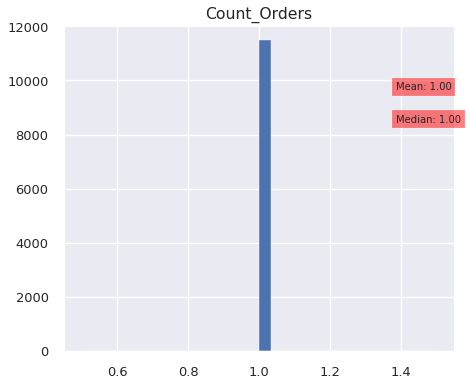

Cluster 1


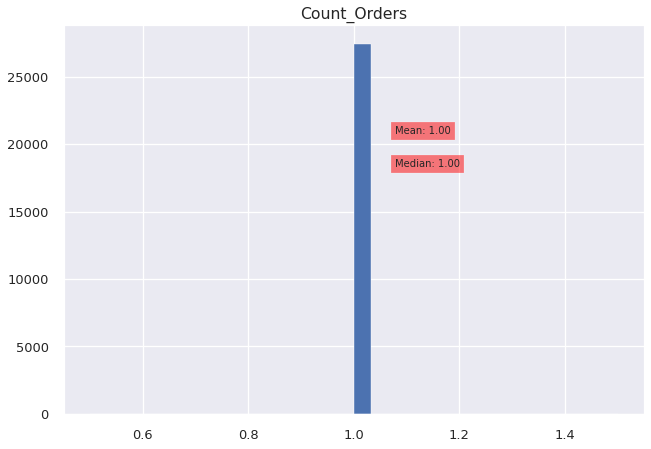

Cluster 2


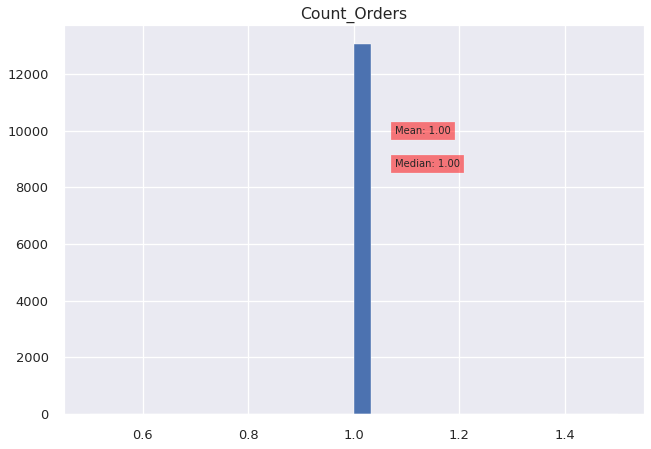

Cluster 3


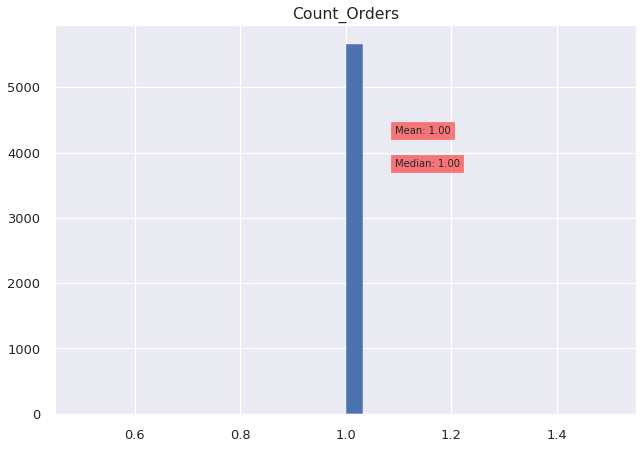

Cluster 4


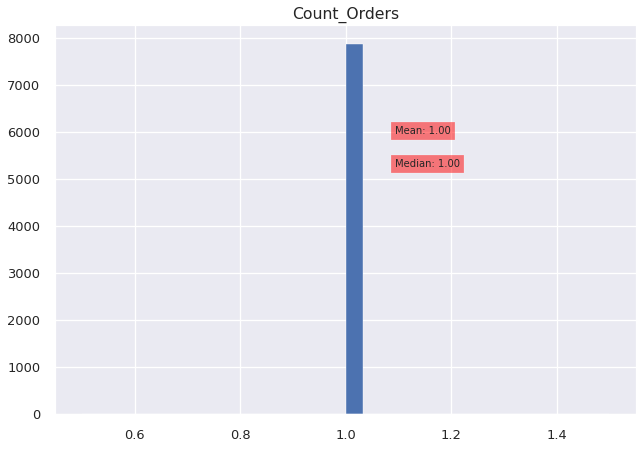

---------------------------------------------------------
count    65604.000000
mean        10.574553
std          7.918312
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         77.000000
Name: Average_Products_Order, dtype: float64
Cluster 0


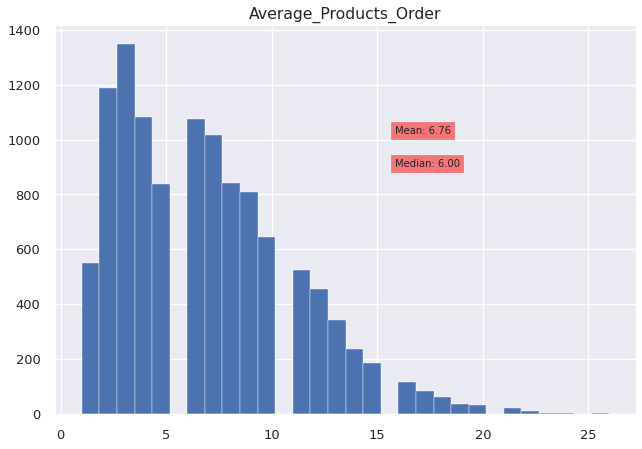

Cluster 1


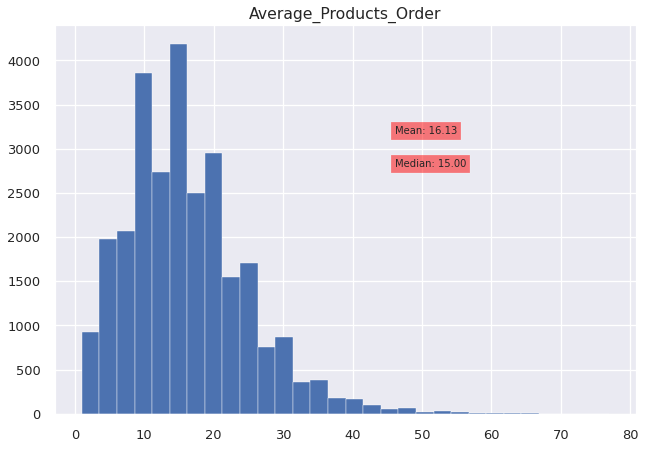

Cluster 2


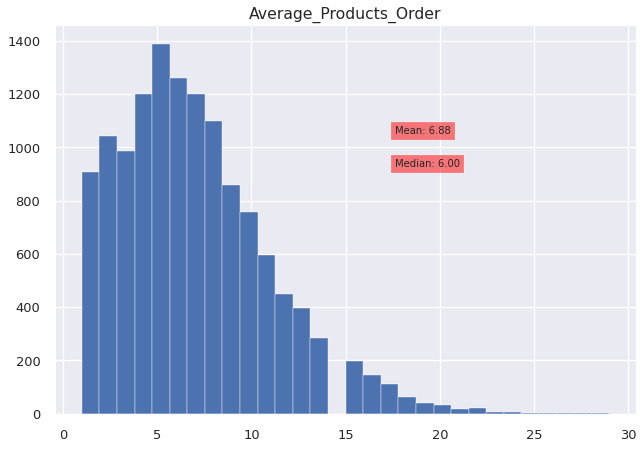

Cluster 3


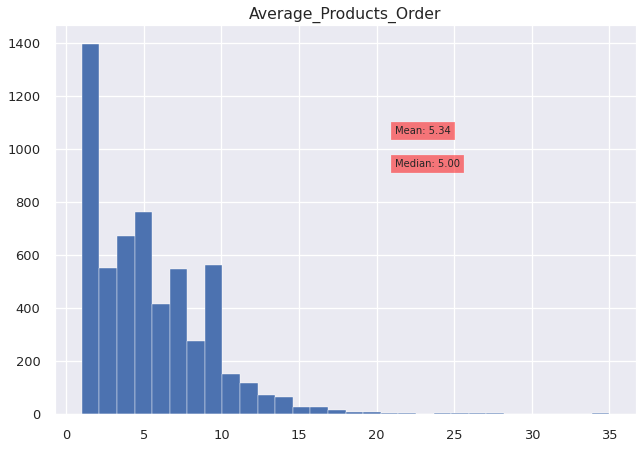

Cluster 4


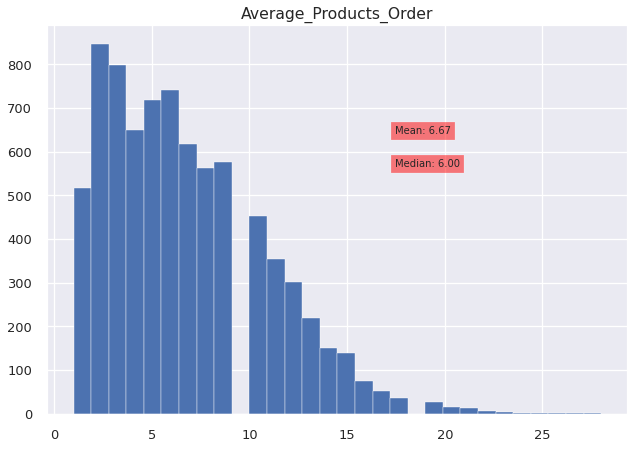

---------------------------------------------------------
count    65604.000000
mean         0.277746
std          0.206043
min          0.000000
25%          0.142857
50%          0.250000
75%          0.380952
max          1.000000
Name: Fruits & Vegs, dtype: float64
Cluster 0


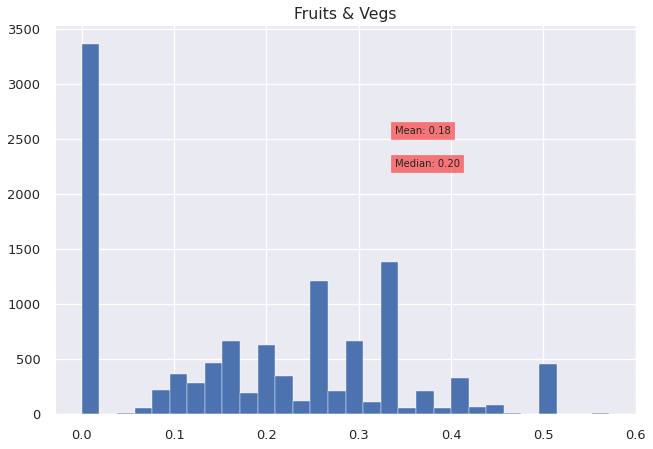

Cluster 1


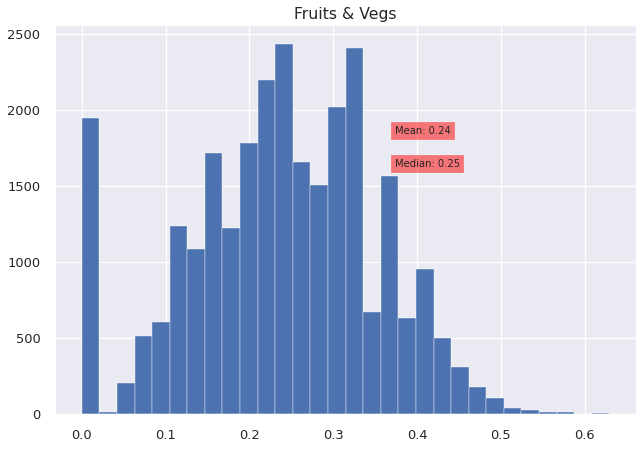

Cluster 2


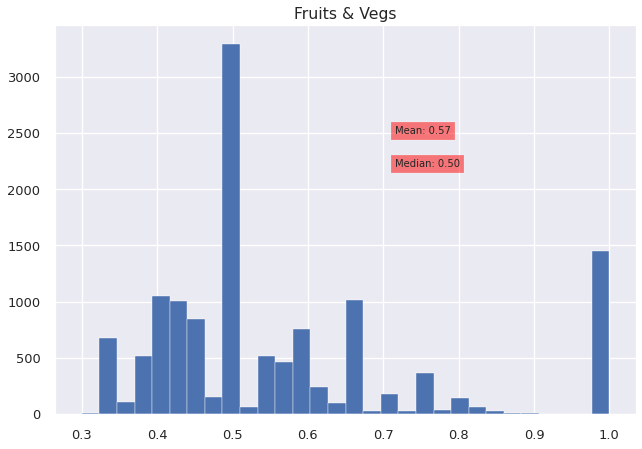

Cluster 3


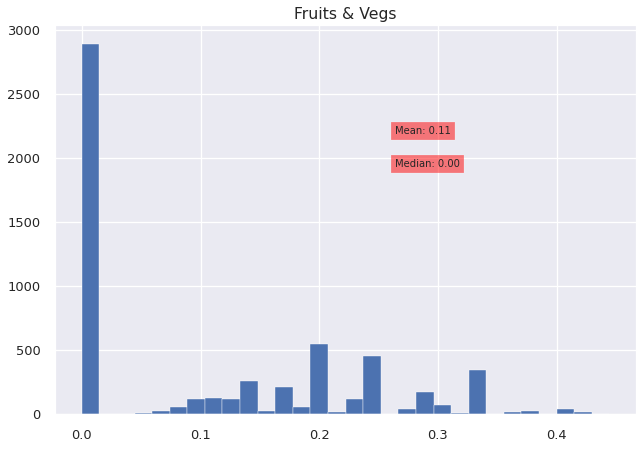

Cluster 4


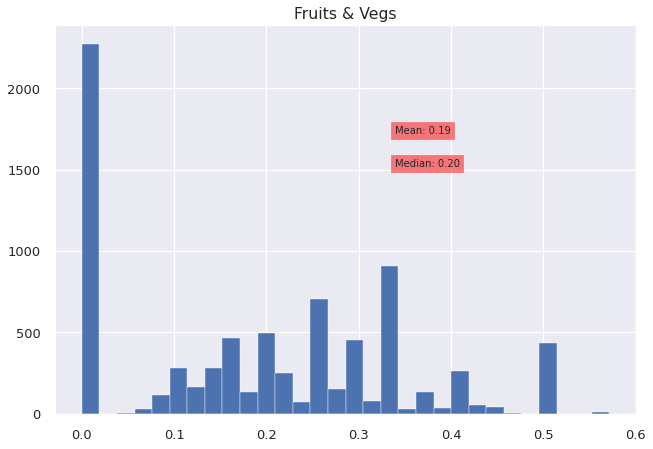

---------------------------------------------------------
count    65604.000000
mean         0.183603
std          0.176119
min          0.000000
25%          0.000000
50%          0.166667
75%          0.280000
max          1.000000
Name: Vegs & Fruits, dtype: float64
Cluster 0


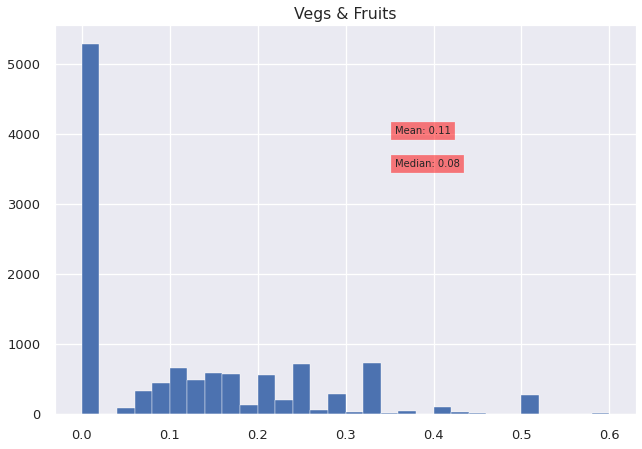

Cluster 1


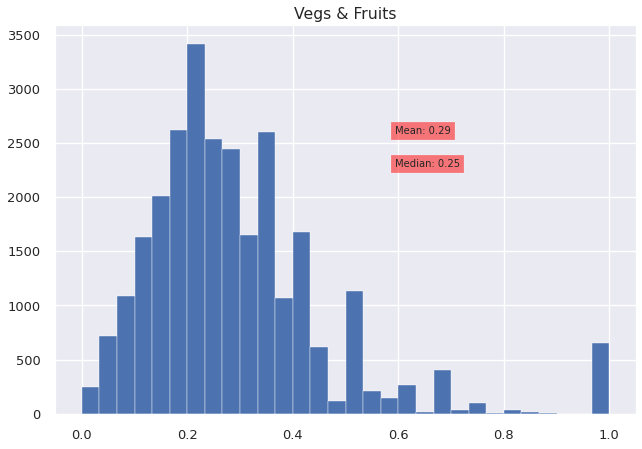

Cluster 2


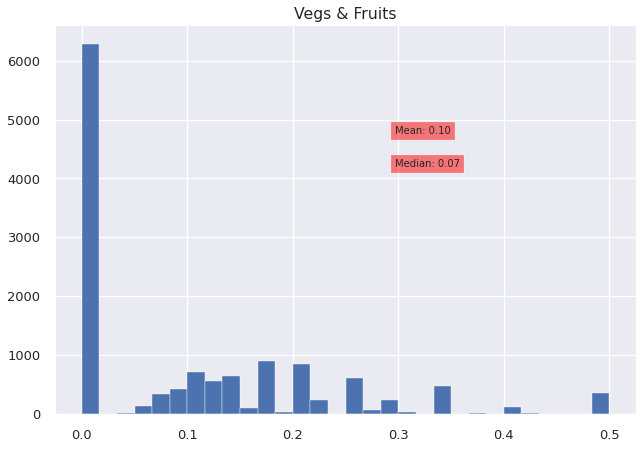

Cluster 3


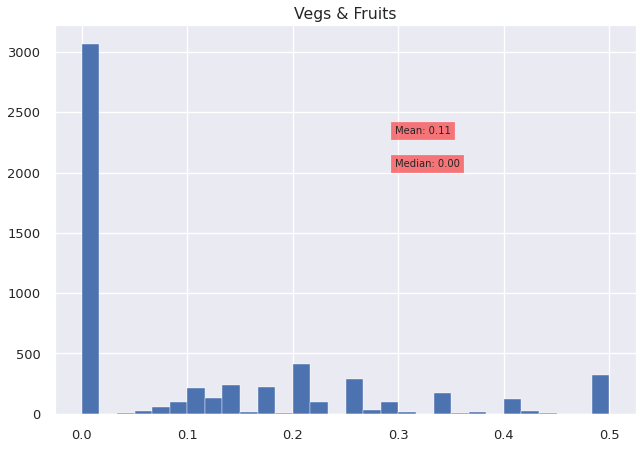

Cluster 4


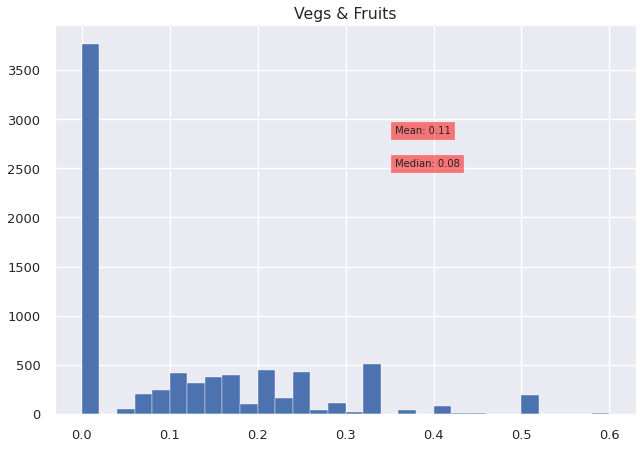

---------------------------------------------------------
count    65604.000000
mean         0.161742
std          0.166312
min          0.000000
25%          0.000000
50%          0.142857
75%          0.250000
max          1.000000
Name: Yogurt & Fruits, dtype: float64
Cluster 0


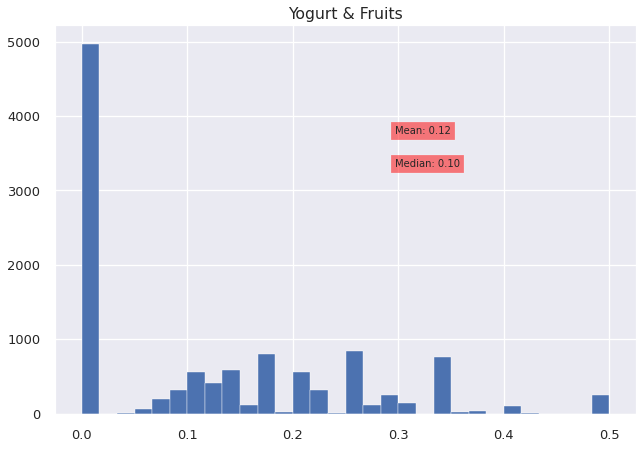

Cluster 1


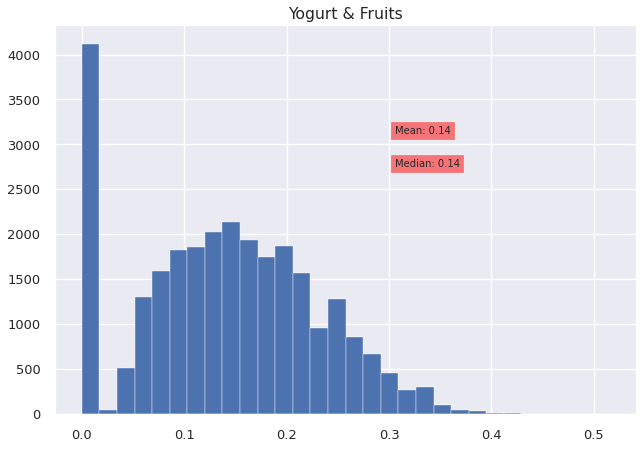

Cluster 2


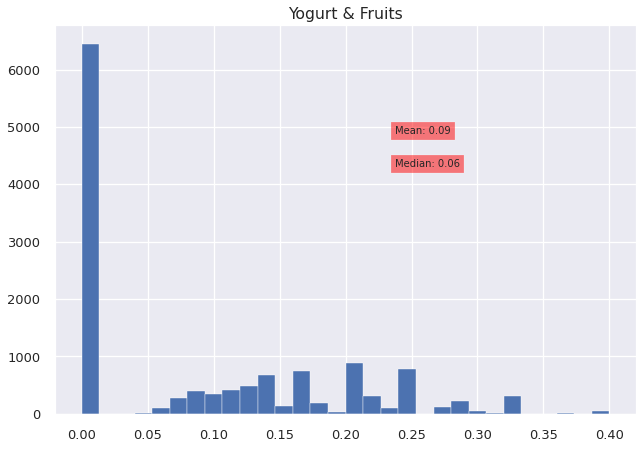

Cluster 3


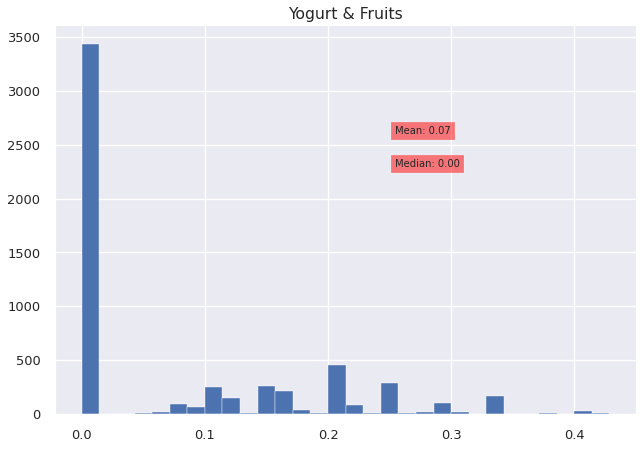

Cluster 4


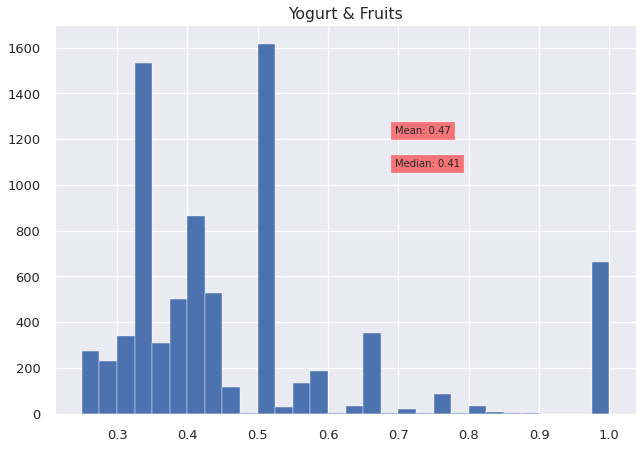

---------------------------------------------------------
count    65604.000000
mean         0.175215
std          0.169889
min          0.000000
25%          0.000000
50%          0.153846
75%          0.250000
max          1.000000
Name: Cheese & Soy, dtype: float64
Cluster 0


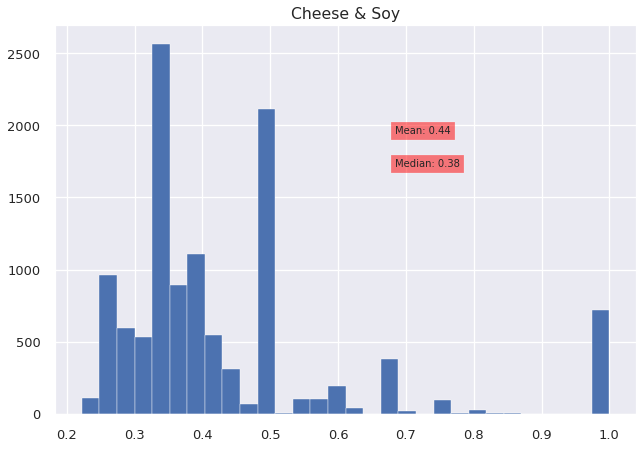

Cluster 1


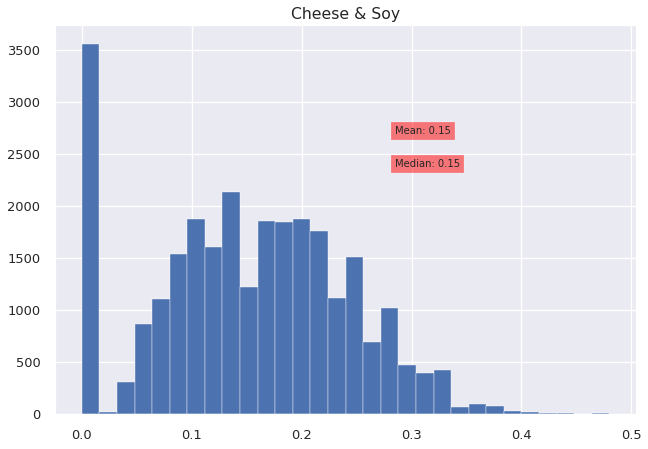

Cluster 2


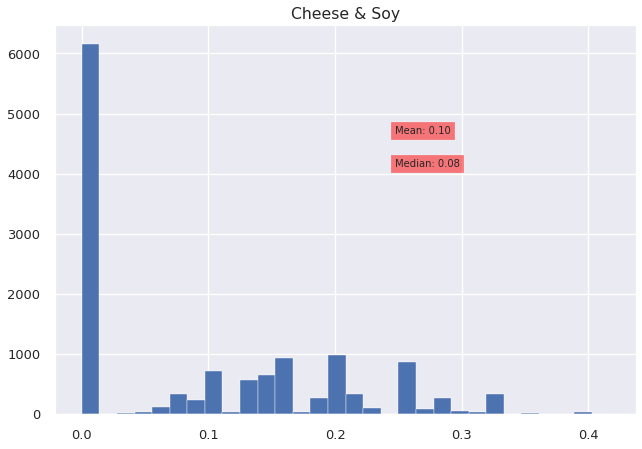

Cluster 3


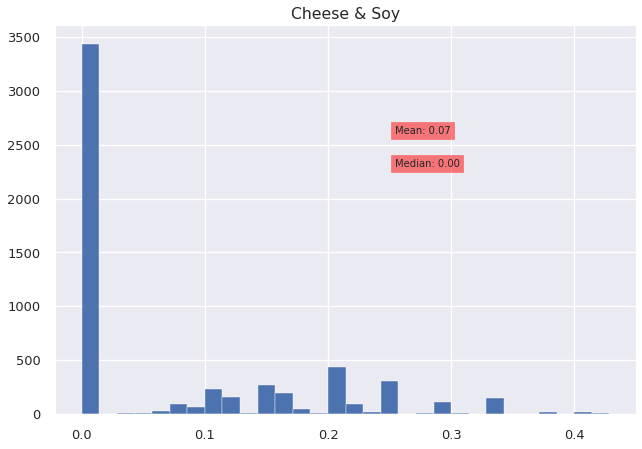

Cluster 4


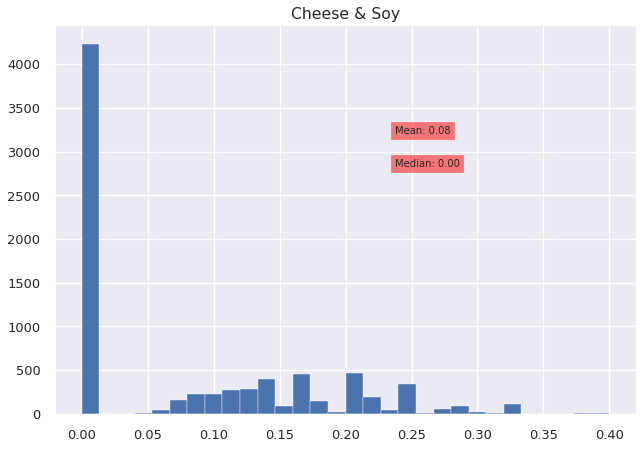

---------------------------------------------------------
count    65604.000000
mean         0.201693
std          0.190022
min          0.000000
25%          0.071429
50%          0.166667
75%          0.285714
max          1.000000
Name: Fruits & Water, dtype: float64
Cluster 0


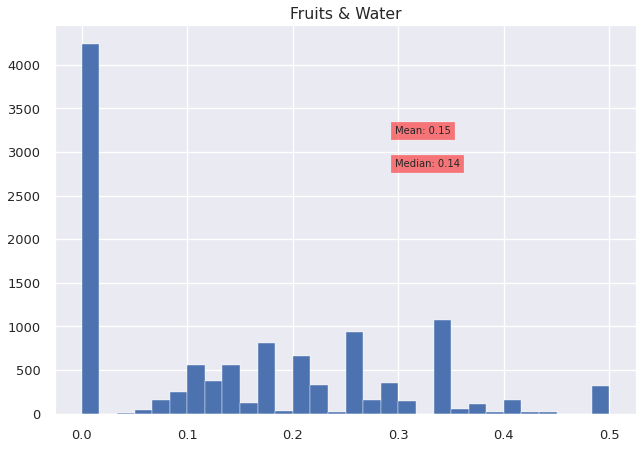

Cluster 1


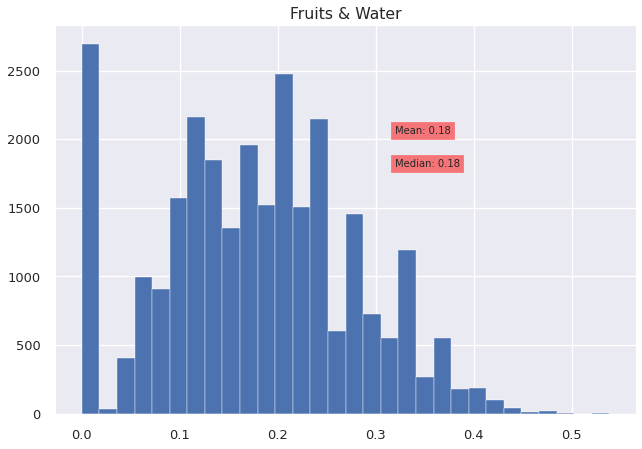

Cluster 2


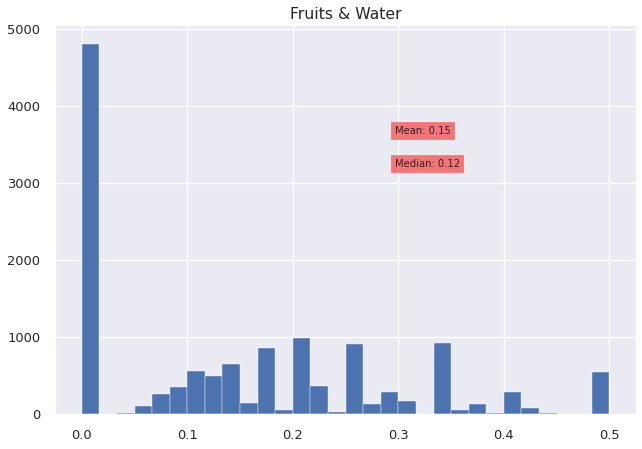

Cluster 3


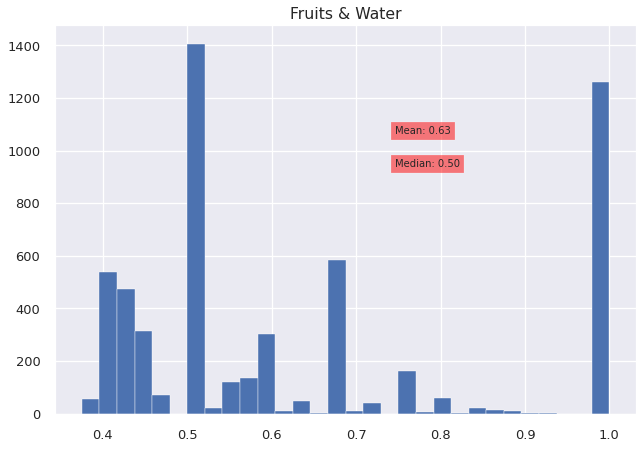

Cluster 4


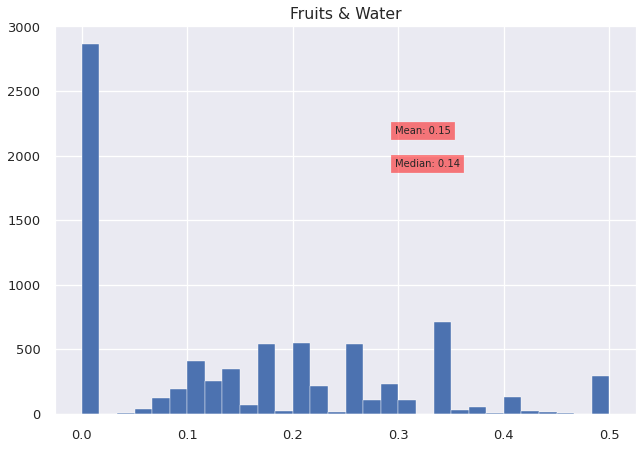

---------------------------------------------------------


In [38]:
hist_kmeans_clusters(5)

In [39]:
df_kmeans_clusters(5)

,A/Number_Of_Customers,B/Count_Orders,C/Average_Products_Order,D/Fruits & Vegs,E/Vegs & Fruits,F/Yogurt & Fruits,G/Cheese & Soy,H/Fruits & Water,N/
0,11495,0.00 %,-36.11 %,-33.59 %,-39.64 %,-25.20 %,149.91 %,-27.67 %,-27.67 %
1,27478,0.00 %,52.55 %,-13.73 %,57.67 %,-12.83 %,-13.37 %,-11.69 %,-11.69 %
2,13081,0.00 %,-34.94 %,104.04 %,-44.67 %,-44.05 %,-45.40 %,-27.84 %,-27.84 %
3,5670,0.00 %,-49.51 %,-61.66 %,-39.41 %,-53.71 %,-57.64 %,213.94 %,213.94 %
4,7880,0.00 %,-36.94 %,-31.48 %,-40.77 %,193.28 %,-55.19 %,-26.59 %,-26.59 %


count    65604.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Count_Orders, dtype: float64
Cluster 0


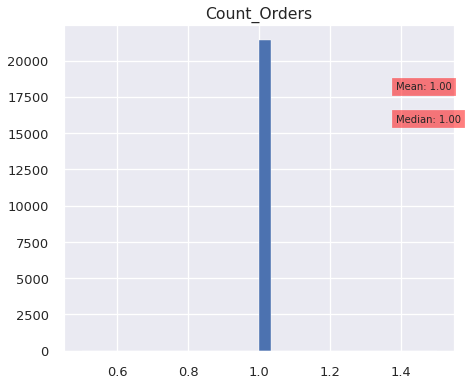

Cluster 1


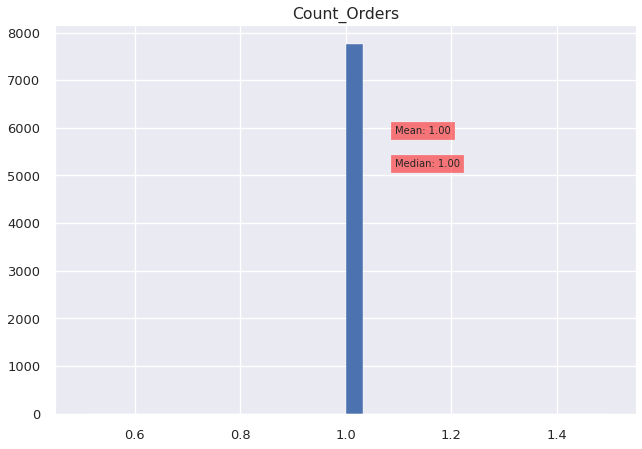

Cluster 2


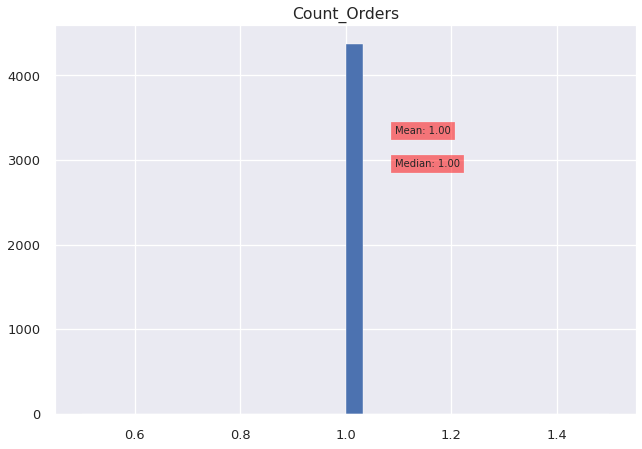

Cluster 3


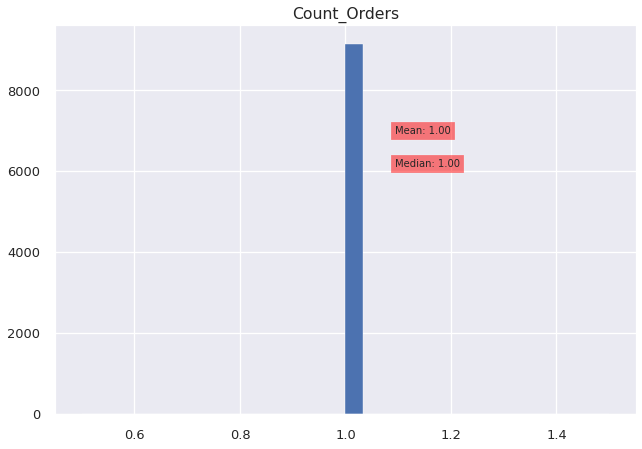

Cluster 4


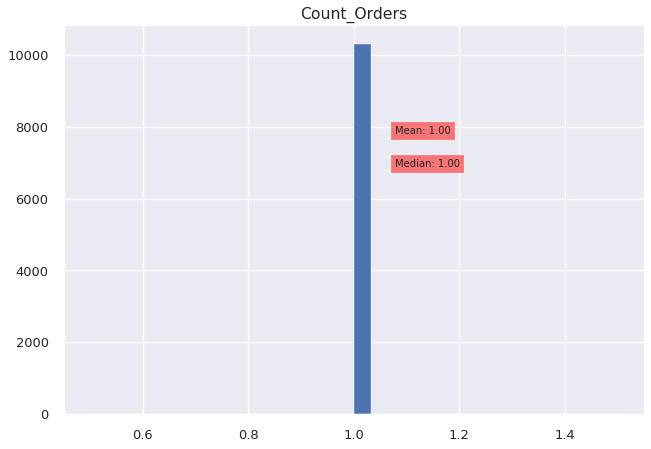

Cluster 5


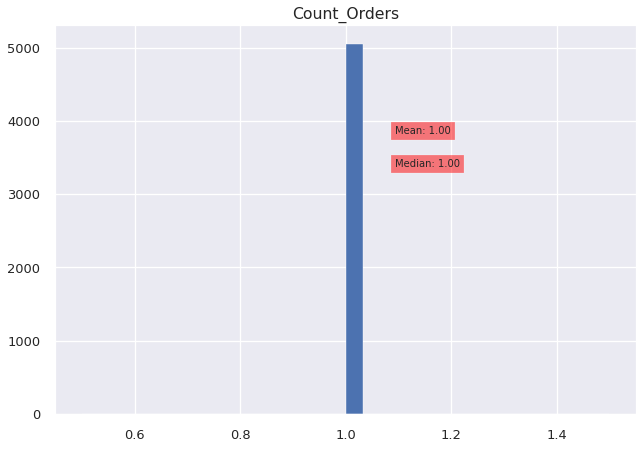

Cluster 6


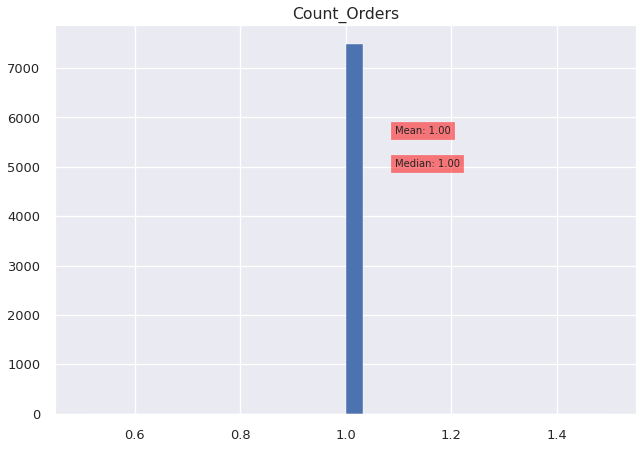

---------------------------------------------------------
count    65604.000000
mean        10.574553
std          7.918312
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         77.000000
Name: Average_Products_Order, dtype: float64
Cluster 0


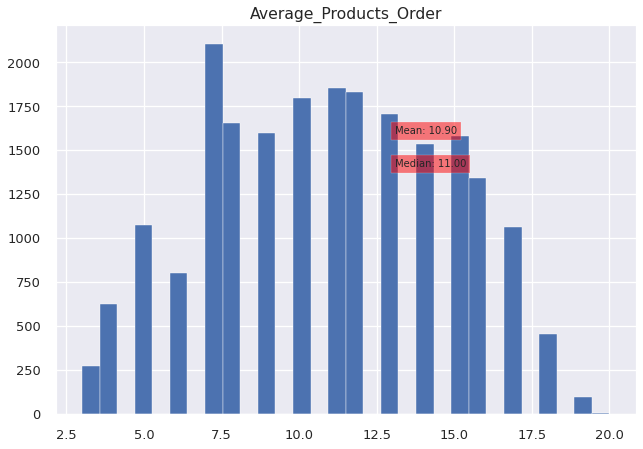

Cluster 1


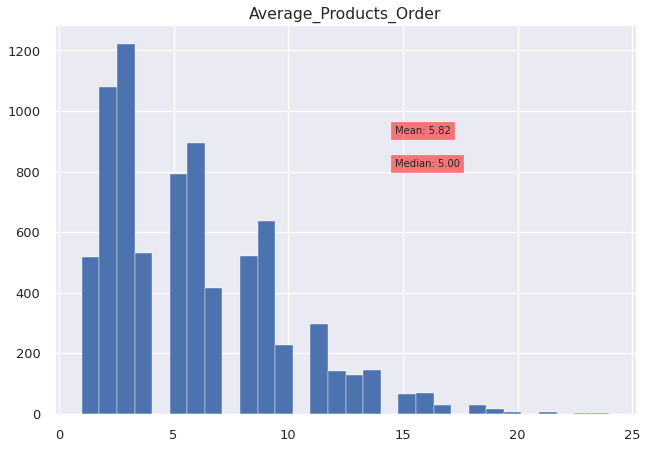

Cluster 2


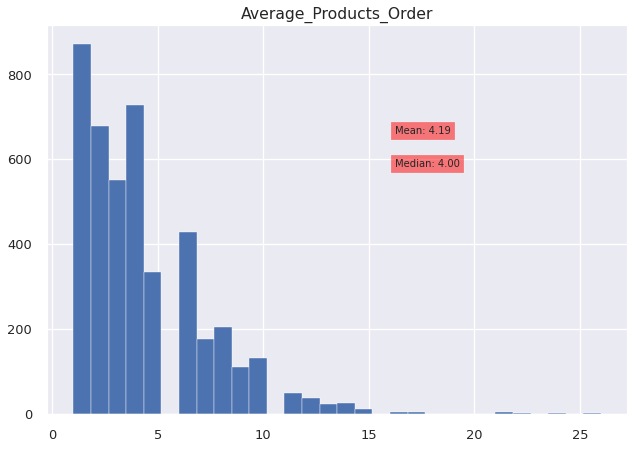

Cluster 3


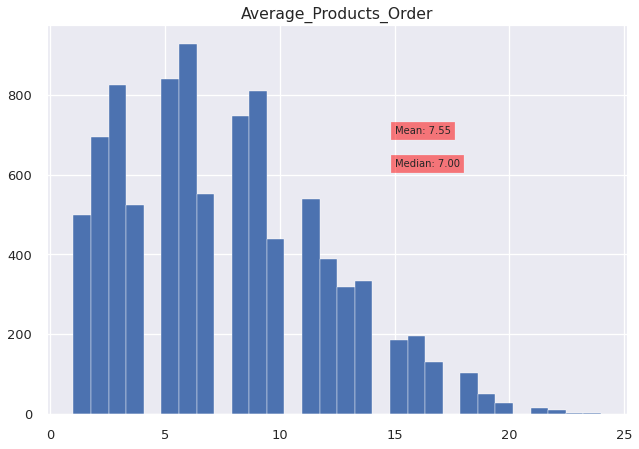

Cluster 4


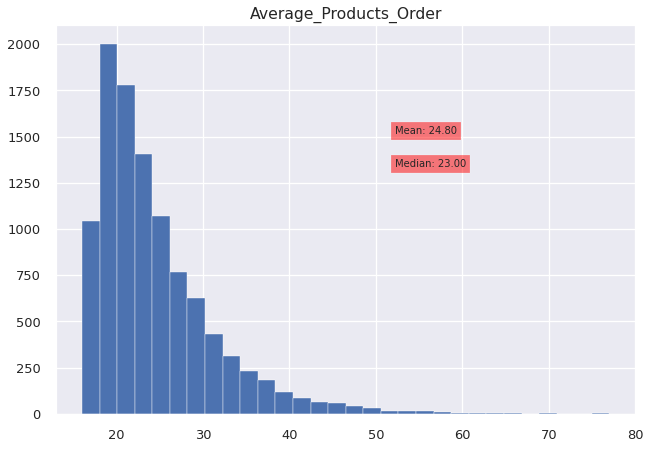

Cluster 5


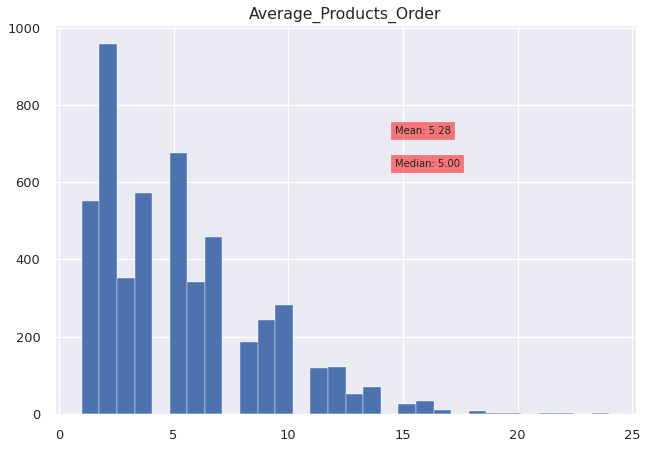

Cluster 6


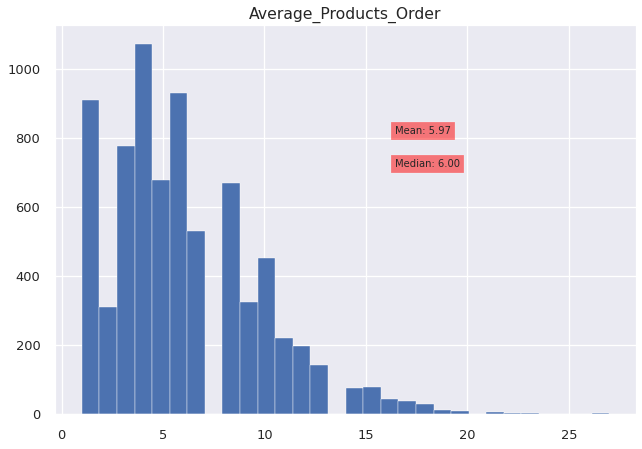

---------------------------------------------------------
count    65604.000000
mean         0.277746
std          0.206043
min          0.000000
25%          0.142857
50%          0.250000
75%          0.380952
max          1.000000
Name: Fruits & Vegs, dtype: float64
Cluster 0


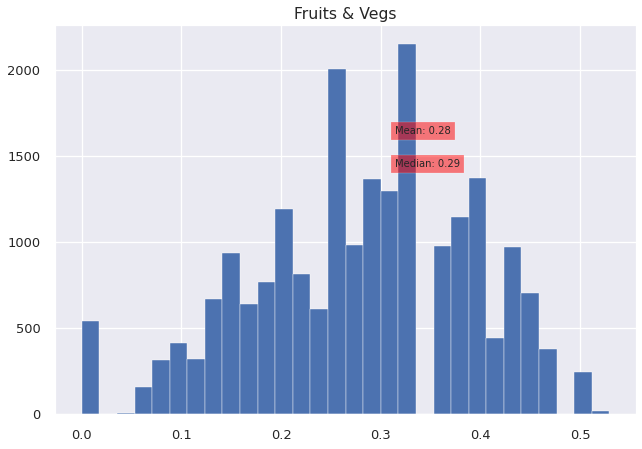

Cluster 1


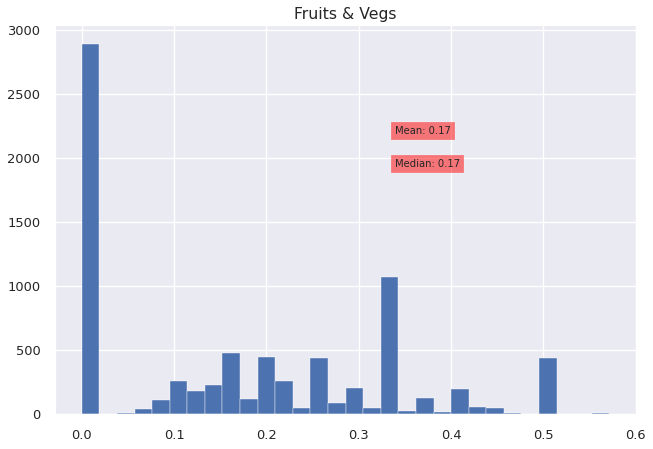

Cluster 2


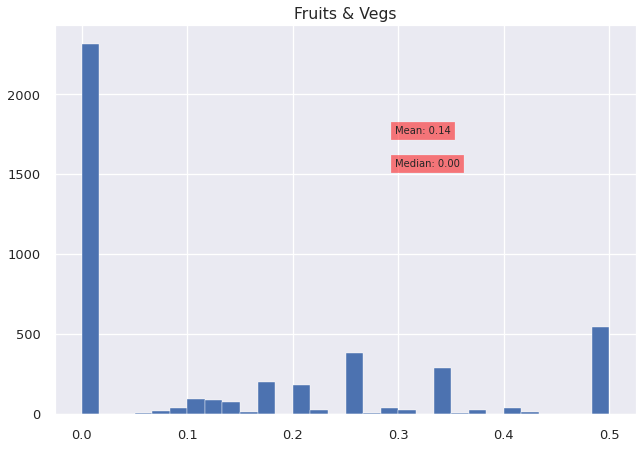

Cluster 3


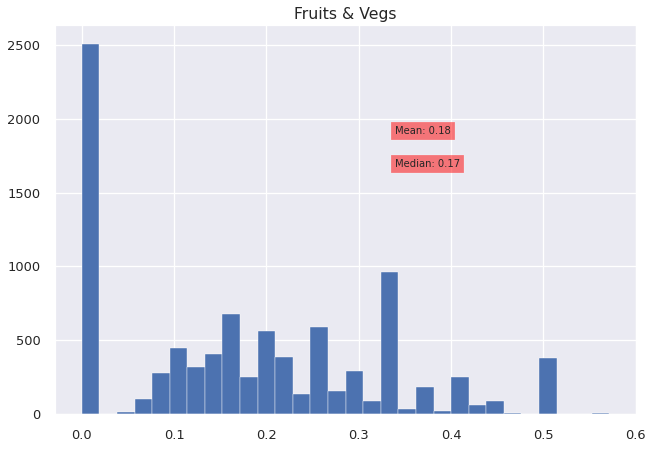

Cluster 4


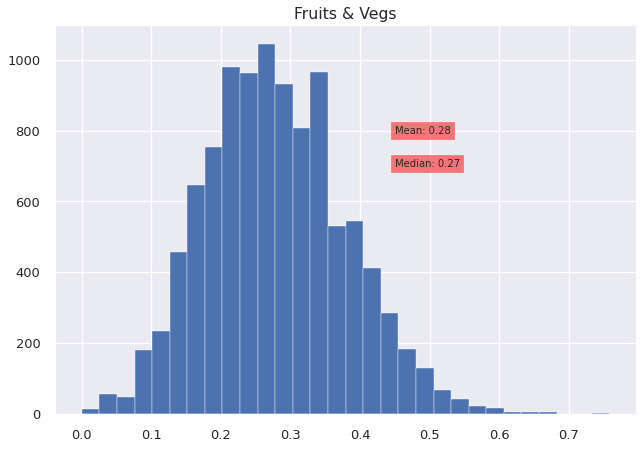

Cluster 5


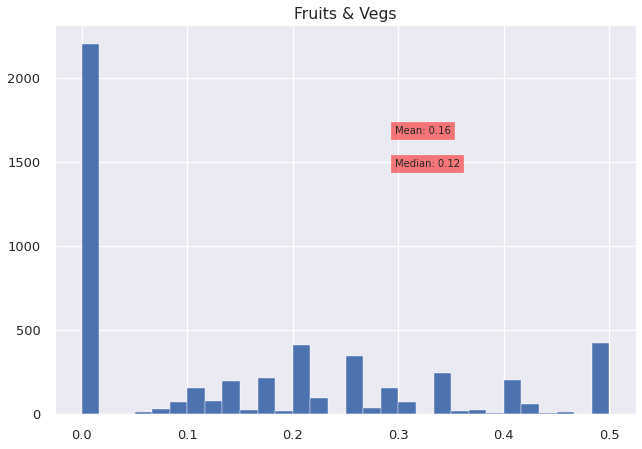

Cluster 6


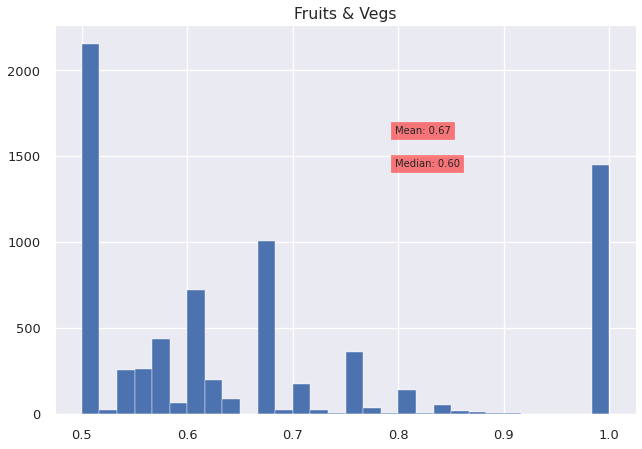

---------------------------------------------------------
count    65604.000000
mean         0.183603
std          0.176119
min          0.000000
25%          0.000000
50%          0.166667
75%          0.280000
max          1.000000
Name: Vegs & Fruits, dtype: float64
Cluster 0


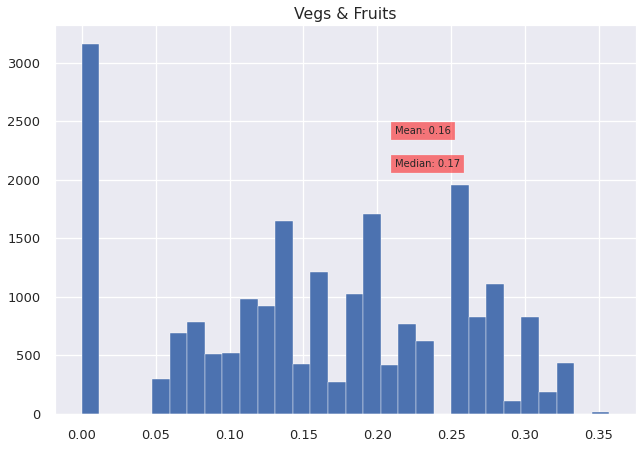

Cluster 1


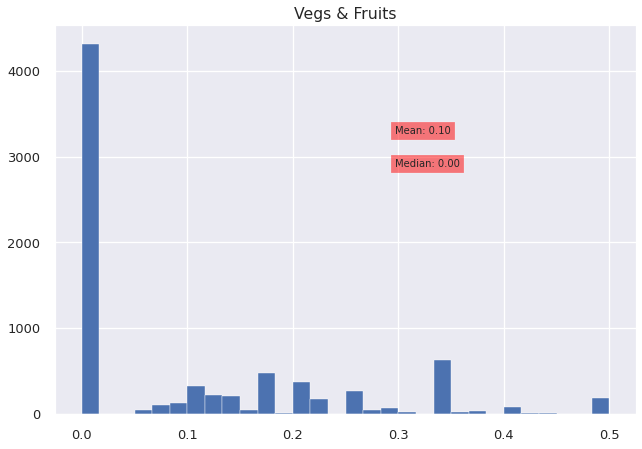

Cluster 2


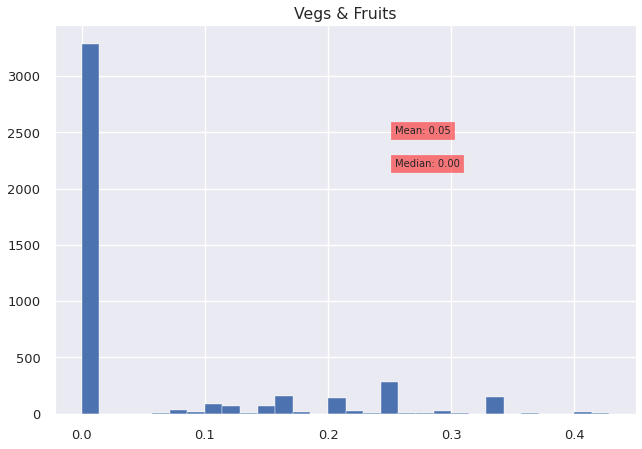

Cluster 3


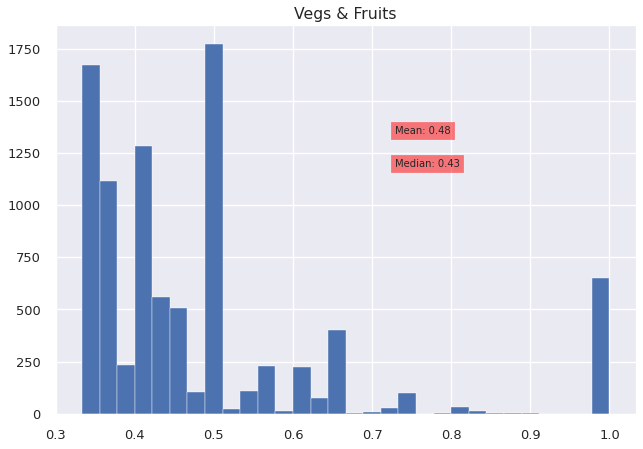

Cluster 4


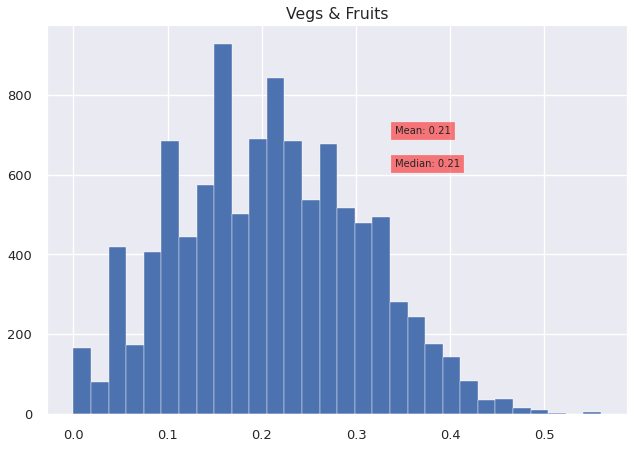

Cluster 5


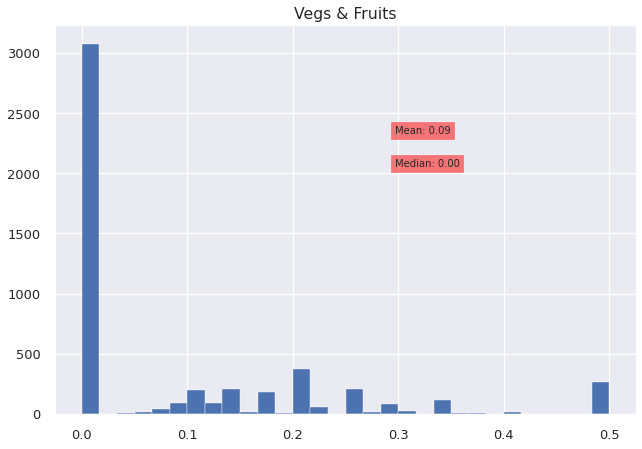

Cluster 6


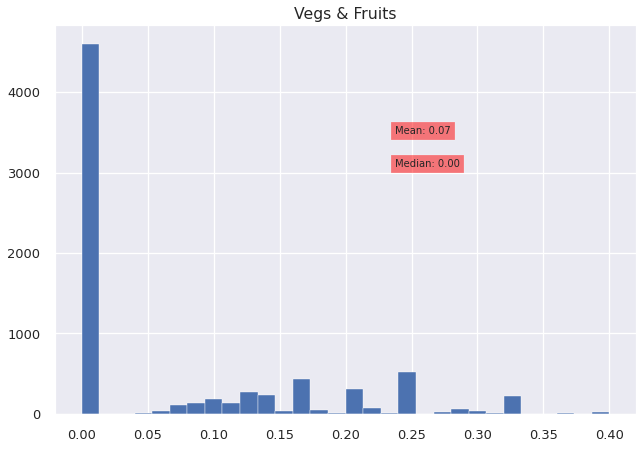

---------------------------------------------------------
count    65604.000000
mean         0.161742
std          0.166312
min          0.000000
25%          0.000000
50%          0.142857
75%          0.250000
max          1.000000
Name: Yogurt & Fruits, dtype: float64
Cluster 0


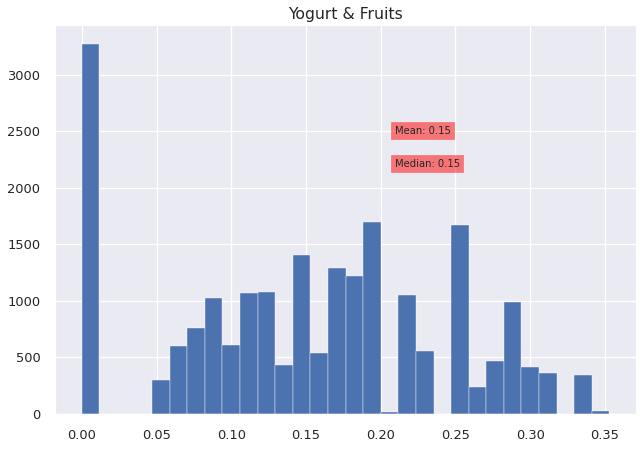

Cluster 1


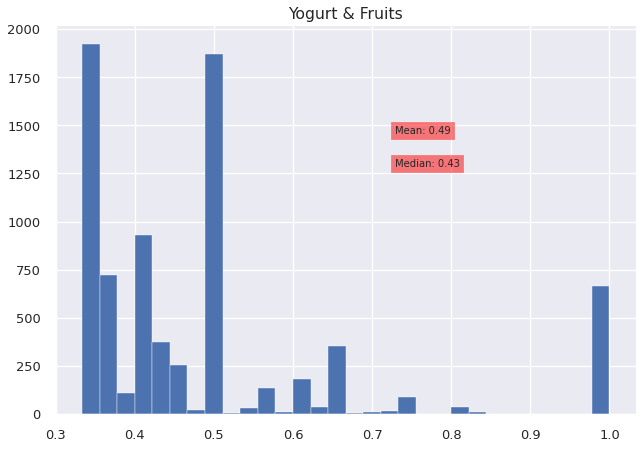

Cluster 2


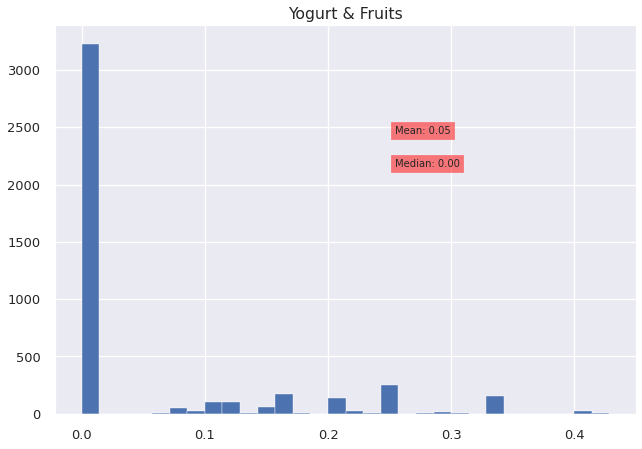

Cluster 3


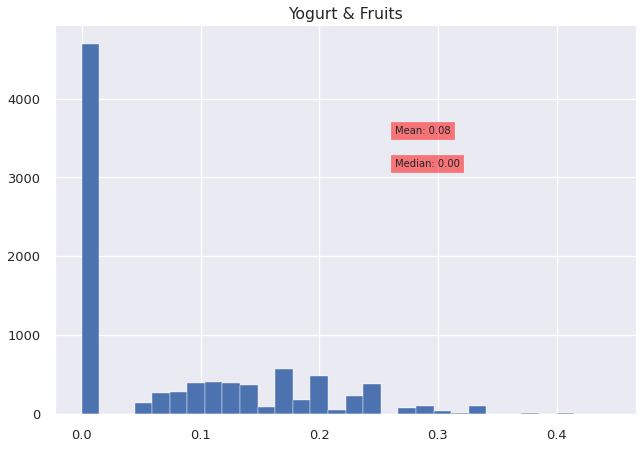

Cluster 4


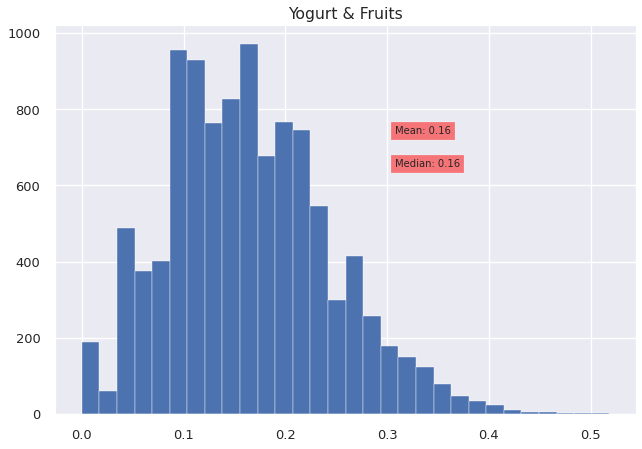

Cluster 5


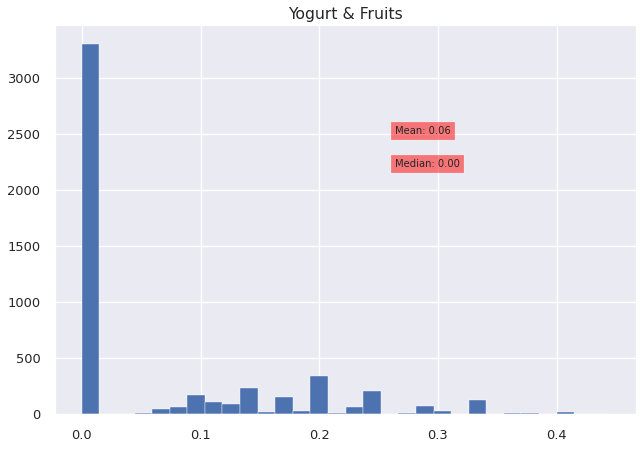

Cluster 6


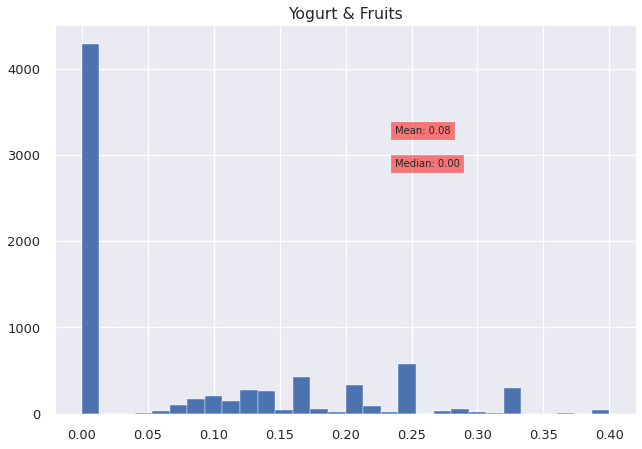

---------------------------------------------------------
count    65604.000000
mean         0.175215
std          0.169889
min          0.000000
25%          0.000000
50%          0.153846
75%          0.250000
max          1.000000
Name: Cheese & Soy, dtype: float64
Cluster 0


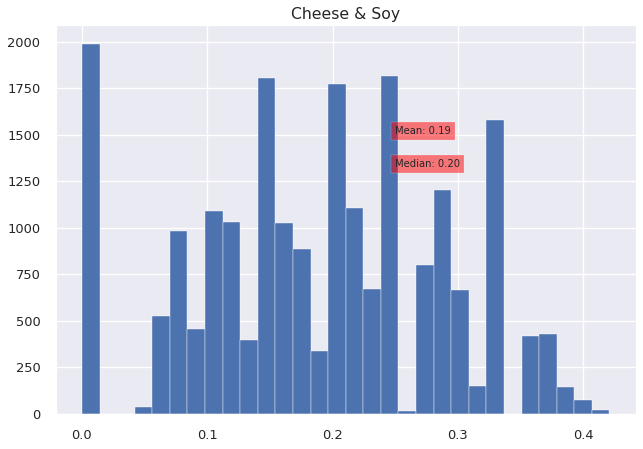

Cluster 1


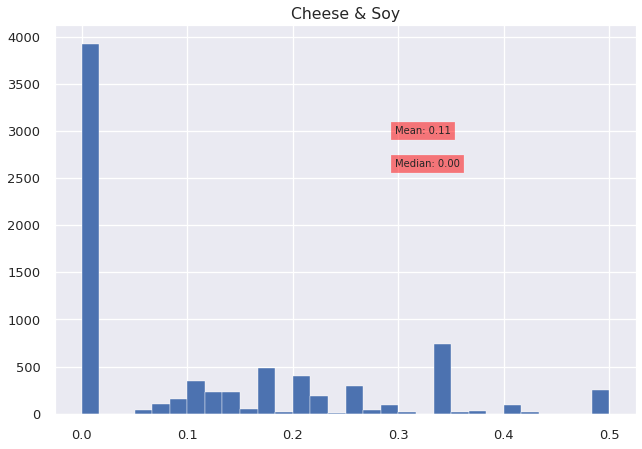

Cluster 2


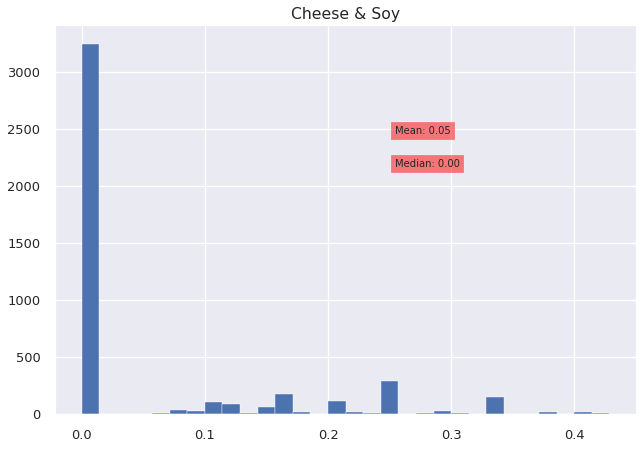

Cluster 3


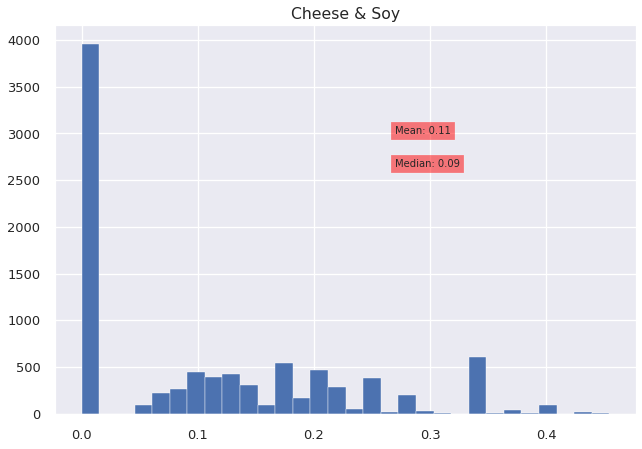

Cluster 4


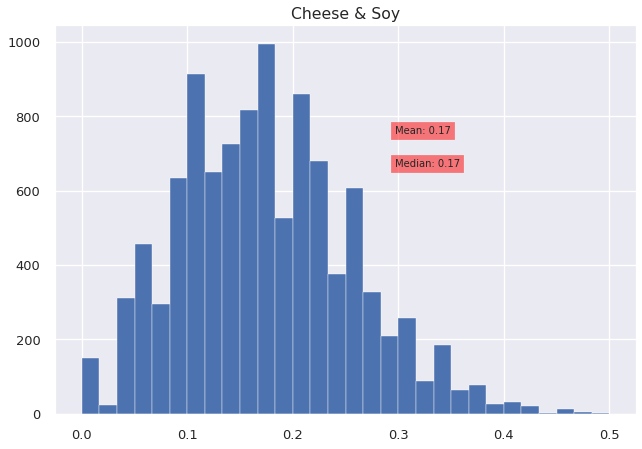

Cluster 5


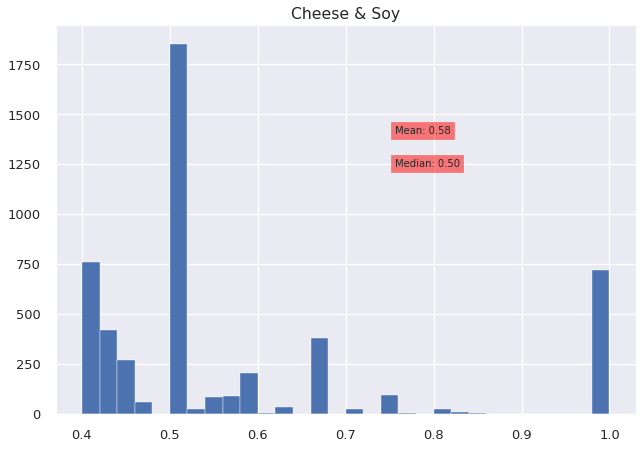

Cluster 6


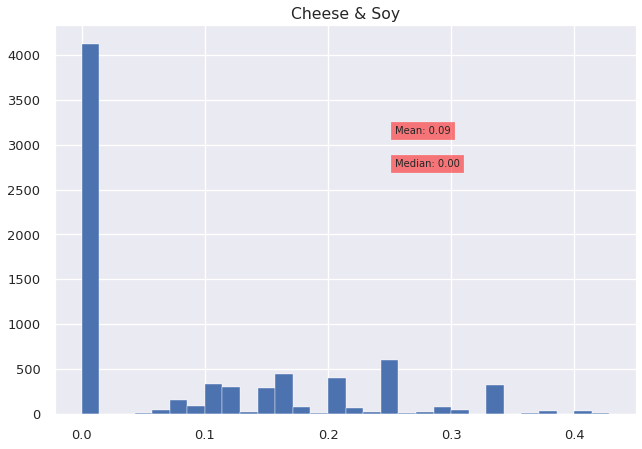

---------------------------------------------------------
count    65604.000000
mean         0.201693
std          0.190022
min          0.000000
25%          0.071429
50%          0.166667
75%          0.285714
max          1.000000
Name: Fruits & Water, dtype: float64
Cluster 0


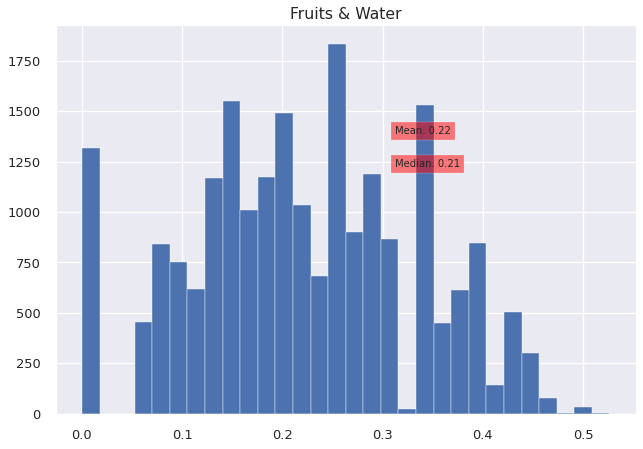

Cluster 1


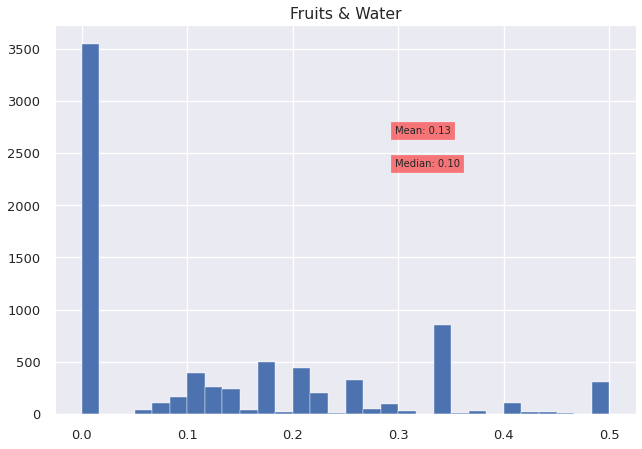

Cluster 2


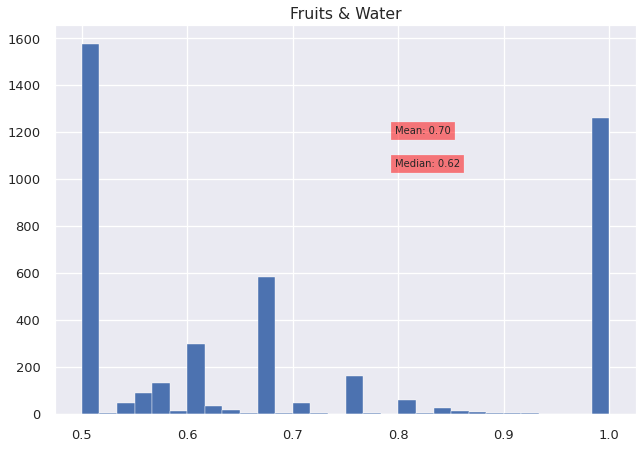

Cluster 3


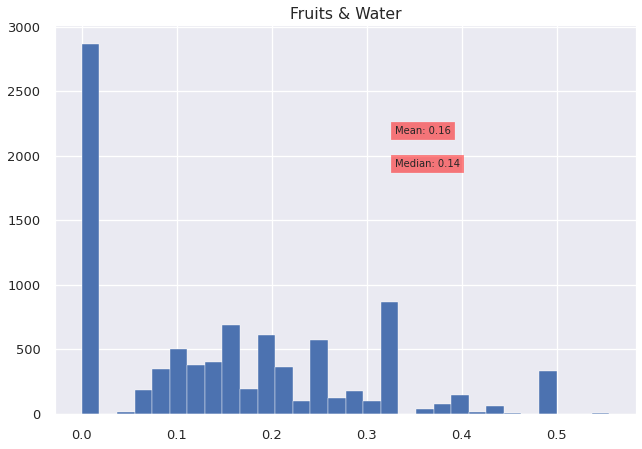

Cluster 4


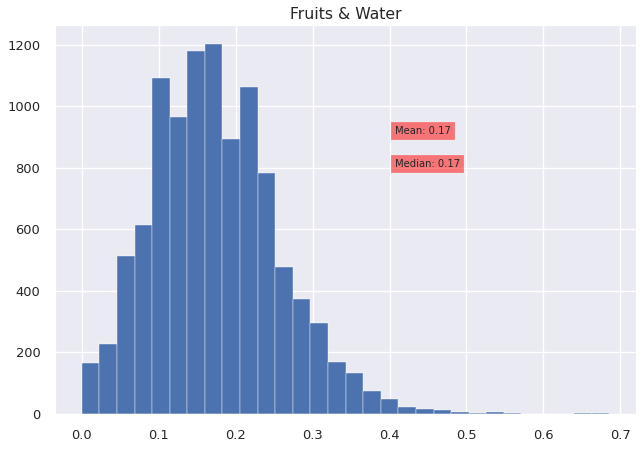

Cluster 5


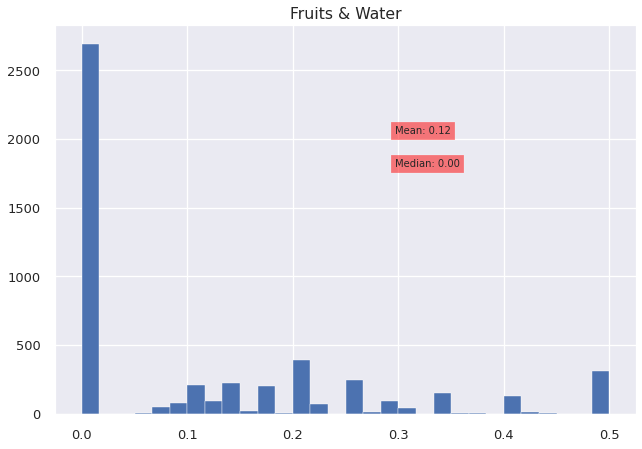

Cluster 6


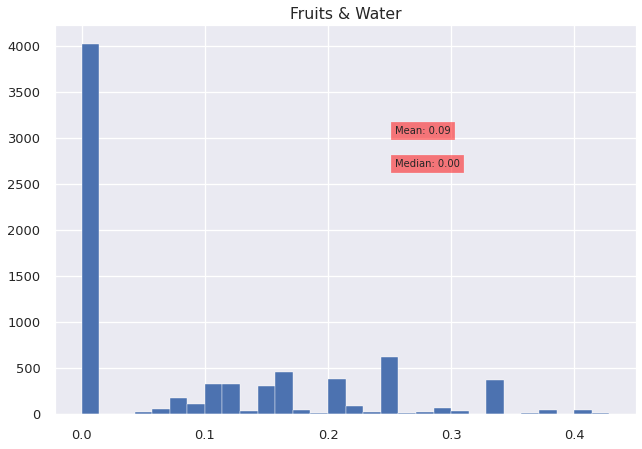

---------------------------------------------------------


In [40]:
hist_kmeans_clusters(7)

In [41]:
df_kmeans_clusters(7)

,A/Number_Of_Customers,B/Count_Orders,C/Average_Products_Order,D/Fruits & Vegs,E/Vegs & Fruits,F/Yogurt & Fruits,G/Cheese & Soy,H/Fruits & Water,N/
0,21409,0.00 %,3.07 %,0.22 %,-12.23 %,-6.27 %,8.06 %,8.85 %,8.85 %
1,7770,0.00 %,-45.00 %,-39.12 %,-45.57 %,201.71 %,-34.55 %,-36.38 %,-36.38 %
2,4378,0.00 %,-60.42 %,-49.05 %,-71.29 %,-66.76 %,-69.46 %,246.32 %,246.32 %
3,9162,0.00 %,-28.56 %,-36.20 %,163.55 %,-51.88 %,-39.52 %,-23.09 %,-23.09 %
4,10328,0.00 %,134.55 %,0.74 %,14.00 %,1.21 %,-1.41 %,-13.51 %,-13.51 %
5,5062,0.00 %,-50.07 %,-44.16 %,-50.91 %,-60.17 %,228.30 %,-42.92 %,-42.92 %
6,7495,0.00 %,-43.51 %,141.63 %,-61.02 %,-49.82 %,-50.57 %,-55.61 %,-55.61 %


In [45]:
def hist_dbscan_clusters(epsilon, minimum):
    ''' For each feature this fonction plot histograms of your dbscan model's clusters.
    
    Parameters:
      
      epsilon (float): the value of eps in DBSCAN clustering
      minimum (int): the value of min_samples in DBSCAN clustering
      
  '''
  
    dbsc = DBSCAN(eps =epsilon, min_samples = minimum).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype = bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels))
  
    fig, ax = plt.subplots(figsize=(7,6))

    for i in ['Count_Orders', 'Average_Products_Order', 'Fruits & Vegs',
       'Vegs & Fruits', 'Yogurt & Fruits', 'Cheese & Soy', 'Fruits & Water']:
        print(df_customers[i].describe())

        for id_cluster in range(-1, n_clusters_ -1):
            print("Cluster %d" % id_cluster)
            index = np.where(labels == id_cluster)[0]
            Mean = df_customers[i][index].mean()
            Median = df_customers[i][index].median()
            plt.hist(df_customers[i][index], bins = 30)
            plt.text(0.85, 0.8, 'Mean: %.2f' % Mean, bbox=dict(facecolor='red',
                                                                  alpha=0.5),
                    transform=ax.transAxes)
            plt.text(0.85, 0.7, 'Median: %.2f' % Median, bbox=dict(facecolor='red',
                                                                    alpha=0.5),
                    transform=ax.transAxes)
            plt.title(i)
            plt.show()
        print('---------------------------------------------------------')

In [46]:
def df_dbscan_clusters(epsilon, minimum):
    ''' Show a dataframe with the average percentage difference betwean the mean 
        of each feature and the value of each point for each dbscan model's clusters.
  
    Parameters:
      
        epsilon (float): the value of eps in DBSCAN clustering
        minimum (int): the value of min_samples in DBSCAN clustering
      
    '''
  
    dbsc = DBSCAN(eps =epsilon, min_samples = minimum).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype = bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels))
    my_dict={}
    alphabet = 'BCDEFGHIJKLM'
    my_dict['A/Number_Of_Customers'] = [len(np.where(labels == id_cluster)[0])
                                      for id_cluster in range(-1, n_clusters_ -1)]

    for h,i in enumerate(['Count_Orders', 'Average_Products_Order', 'Fruits & Vegs',
       'Vegs & Fruits', 'Yogurt & Fruits', 'Cheese & Soy', 'Fruits & Water']):
        feature = []

        for id_cluster in range(-1, n_clusters_ -1):
            index = np.where(labels == id_cluster)[0]
            Mean = df_customers[i][index].mean()
            Mean_feature = df_customers[i].mean()
            pourcentage_mean = str('%.2f' % ((Mean - Mean_feature)*100/Mean_feature)) + ' %'
            feature.append(pourcentage_mean)
      
        my_dict[alphabet[h] + '/' + i] = feature
     
    Clusters_df = pd.DataFrame(my_dict, index=range(-1, n_clusters_ -1))
  
    return Clusters_df.head(n_clusters_)

count    65604.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Count_Orders, dtype: float64
Cluster -1


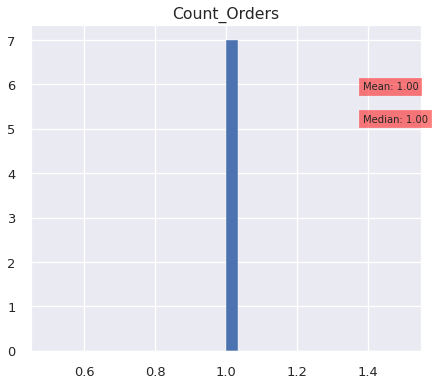

Cluster 0


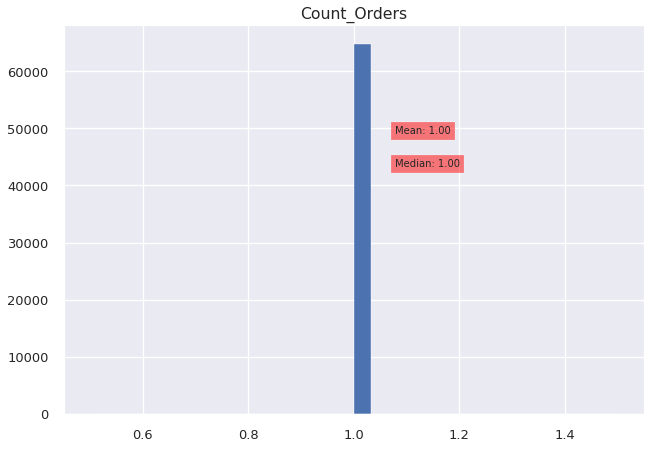

Cluster 1


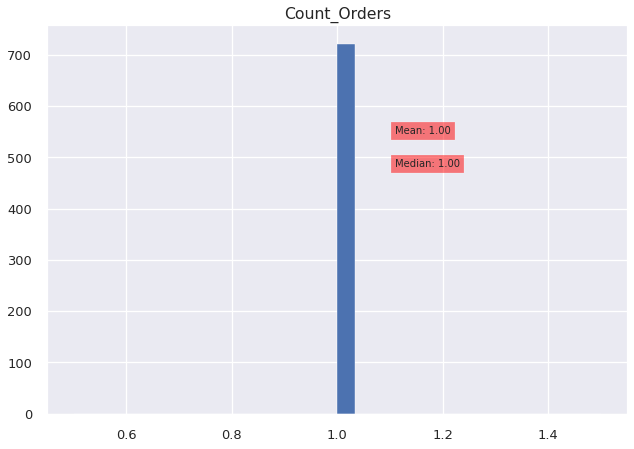

---------------------------------------------------------
count    65604.000000
mean        10.574553
std          7.918312
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         77.000000
Name: Average_Products_Order, dtype: float64
Cluster -1


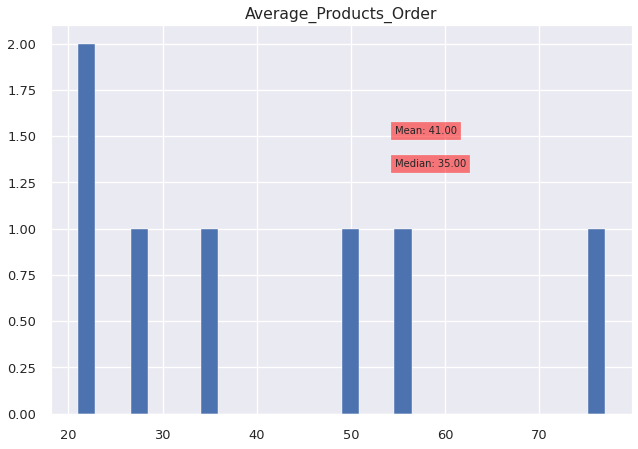

Cluster 0


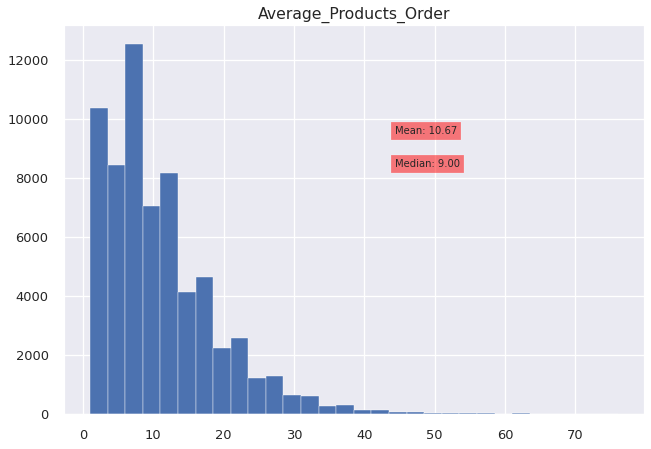

Cluster 1


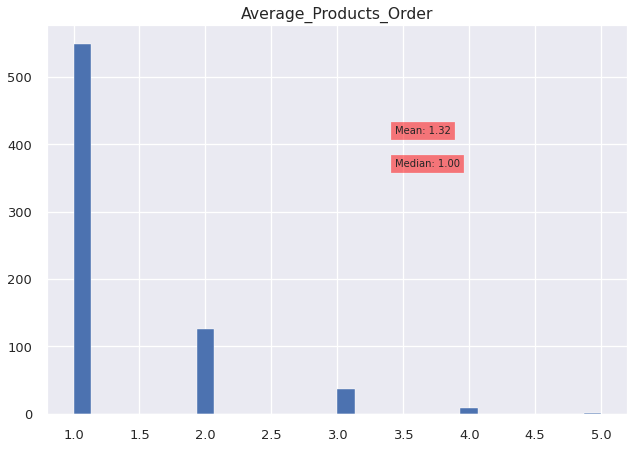

---------------------------------------------------------
count    65604.000000
mean         0.277746
std          0.206043
min          0.000000
25%          0.142857
50%          0.250000
75%          0.380952
max          1.000000
Name: Fruits & Vegs, dtype: float64
Cluster -1


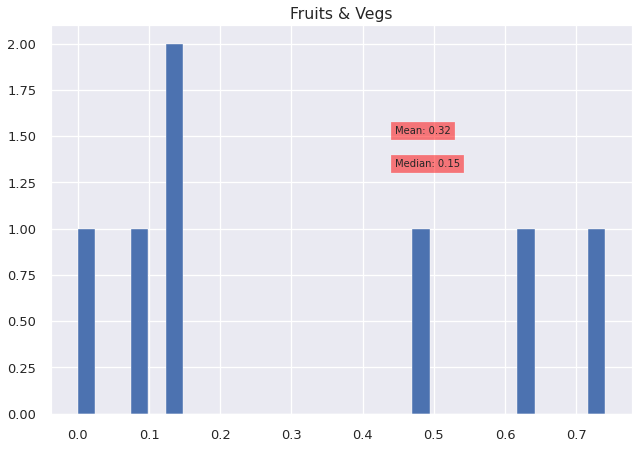

Cluster 0


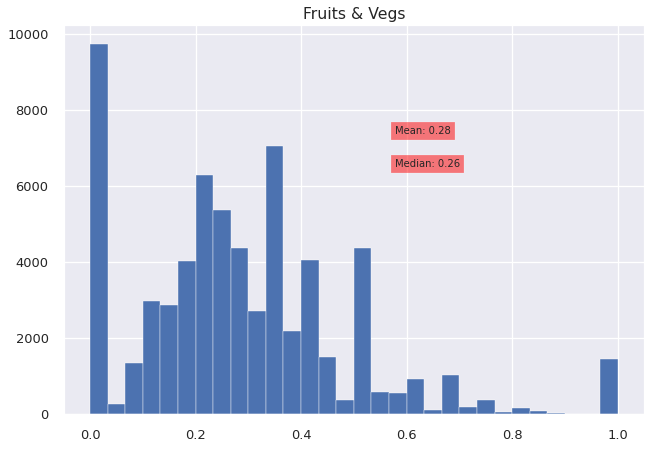

Cluster 1


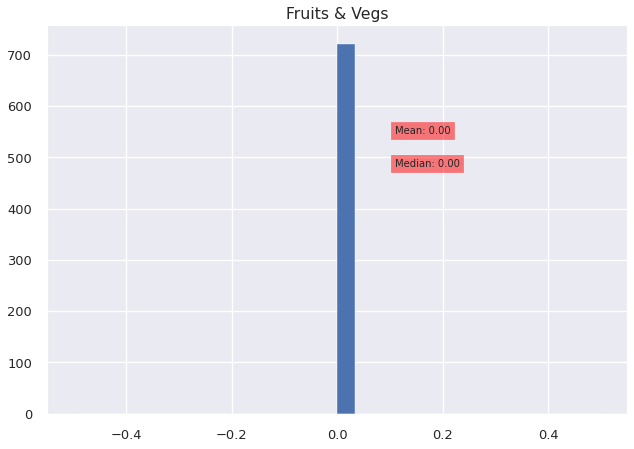

---------------------------------------------------------
count    65604.000000
mean         0.183603
std          0.176119
min          0.000000
25%          0.000000
50%          0.166667
75%          0.280000
max          1.000000
Name: Vegs & Fruits, dtype: float64
Cluster -1


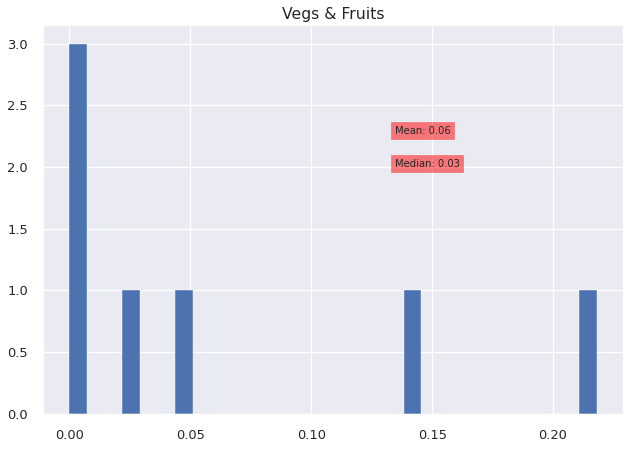

Cluster 0


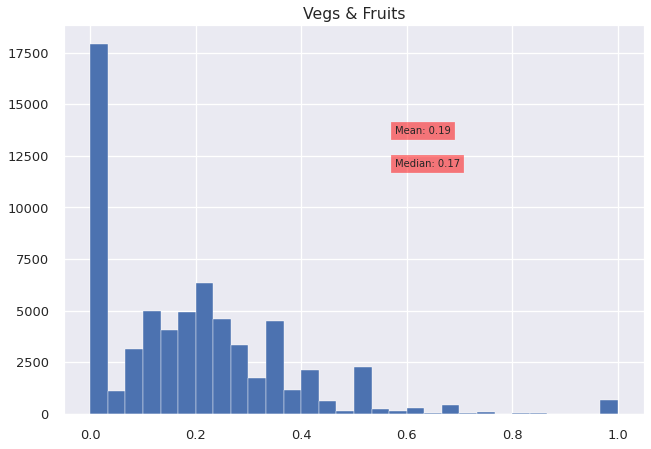

Cluster 1


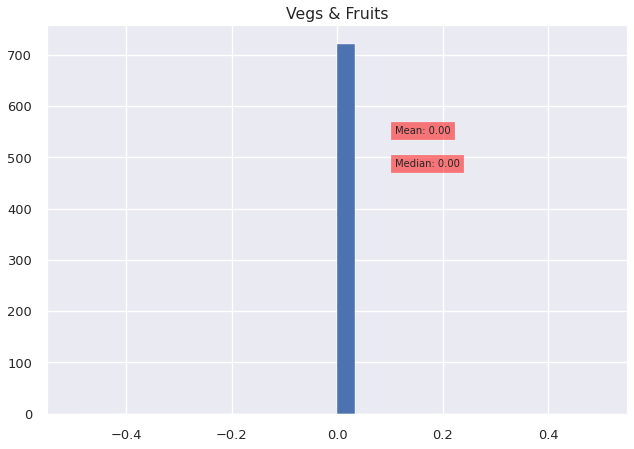

---------------------------------------------------------
count    65604.000000
mean         0.161742
std          0.166312
min          0.000000
25%          0.000000
50%          0.142857
75%          0.250000
max          1.000000
Name: Yogurt & Fruits, dtype: float64
Cluster -1


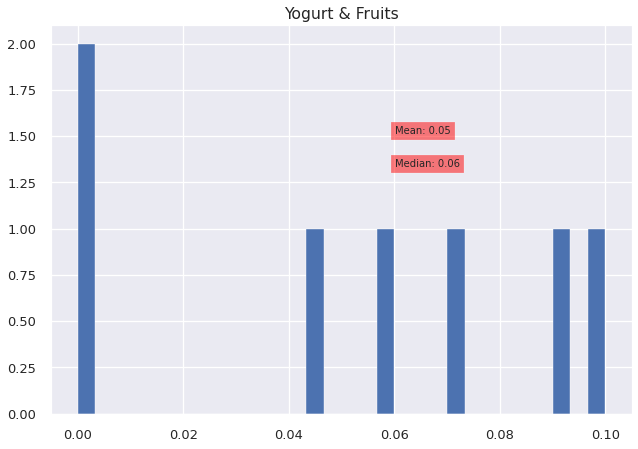

Cluster 0


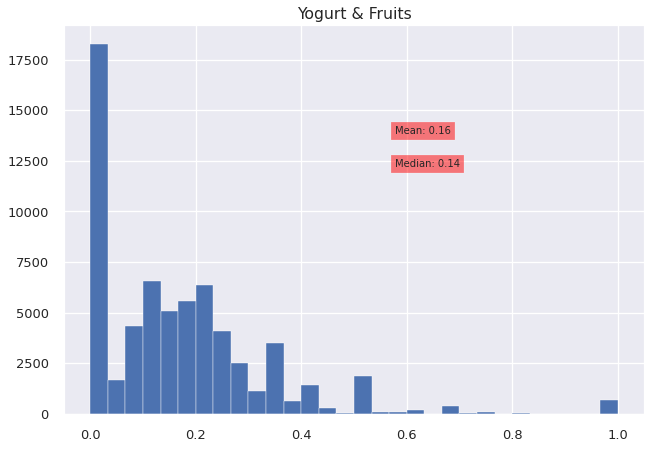

Cluster 1


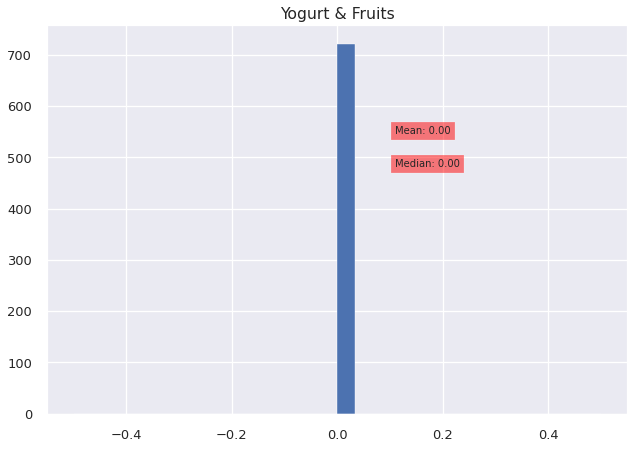

---------------------------------------------------------
count    65604.000000
mean         0.175215
std          0.169889
min          0.000000
25%          0.000000
50%          0.153846
75%          0.250000
max          1.000000
Name: Cheese & Soy, dtype: float64
Cluster -1


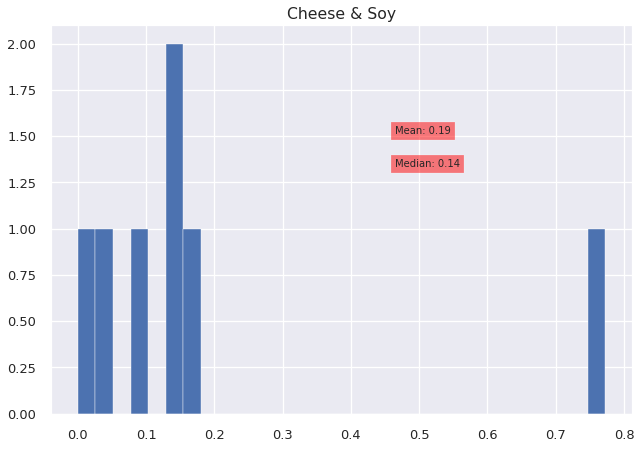

Cluster 0


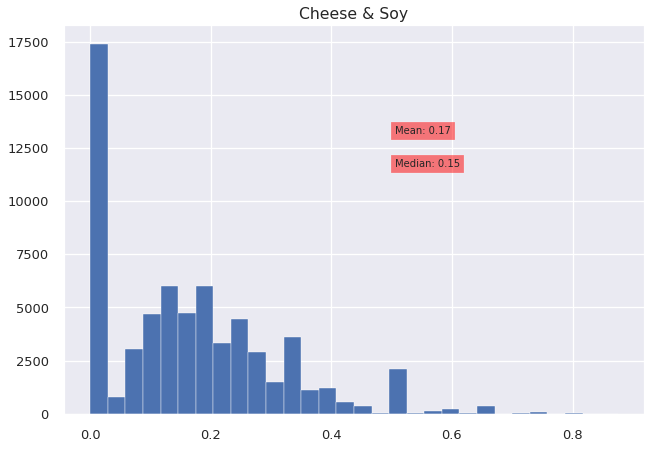

Cluster 1


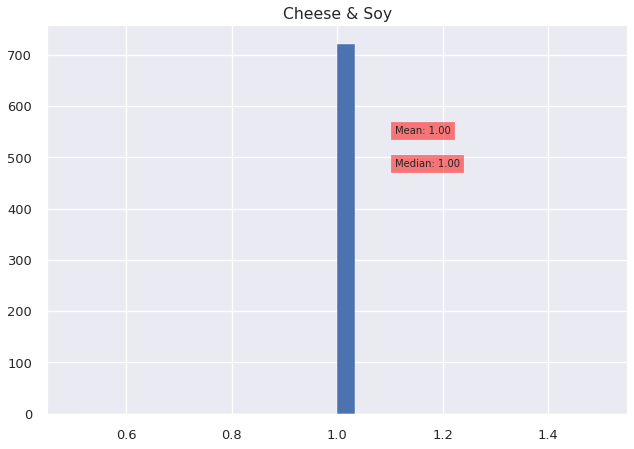

---------------------------------------------------------
count    65604.000000
mean         0.201693
std          0.190022
min          0.000000
25%          0.071429
50%          0.166667
75%          0.285714
max          1.000000
Name: Fruits & Water, dtype: float64
Cluster -1


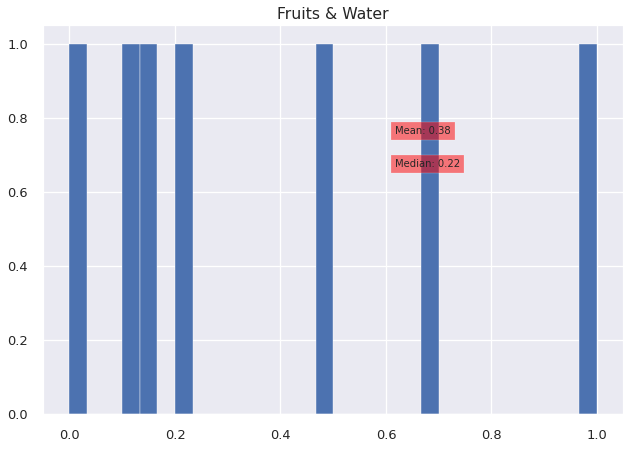

Cluster 0


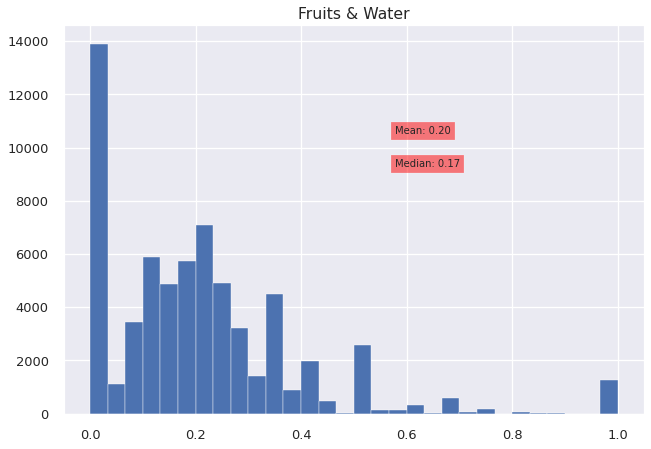

Cluster 1


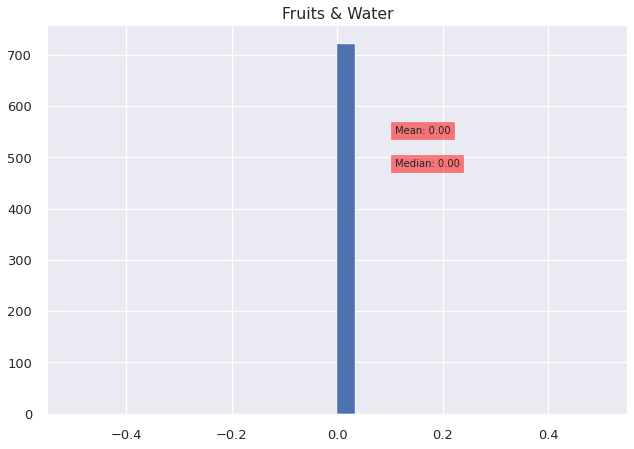

---------------------------------------------------------


In [47]:
hist_dbscan_clusters(1.0, 5)

In [48]:
df_dbscan_clusters(1.0, 5)

,A/Number_Of_Customers,B/Count_Orders,C/Average_Products_Order,D/Fruits & Vegs,E/Vegs & Fruits,F/Yogurt & Fruits,G/Cheese & Soy,H/Fruits & Water
-1,7,0.00 %,287.72 %,14.28 %,-66.15 %,-67.65 %,9.20 %,86.81 %
0,64875,0.00 %,0.94 %,1.11 %,1.12 %,1.12 %,-5.24 %,1.10 %
1,722,0.00 %,-87.56 %,-100.00 %,-100.00 %,-100.00 %,470.73 %,-100.00 %


count    65604.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Count_Orders, dtype: float64
Cluster -1


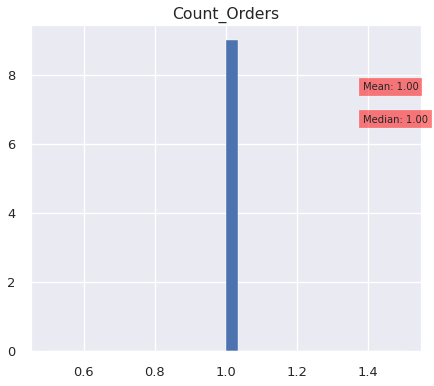

Cluster 0


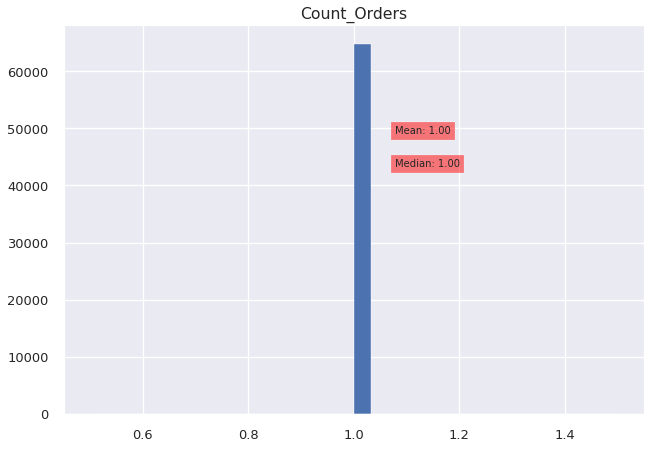

Cluster 1


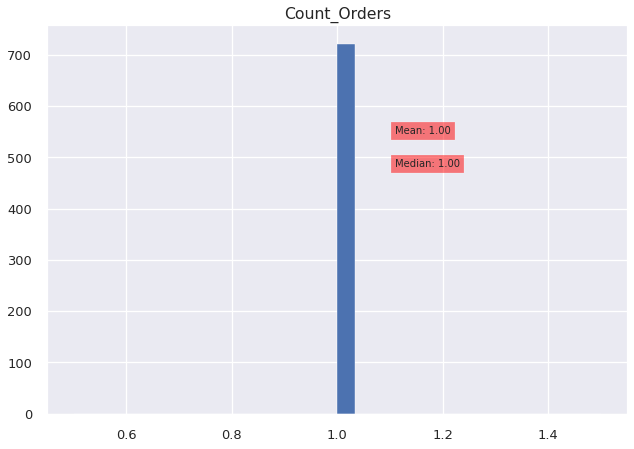

---------------------------------------------------------
count    65604.000000
mean        10.574553
std          7.918312
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         77.000000
Name: Average_Products_Order, dtype: float64
Cluster -1


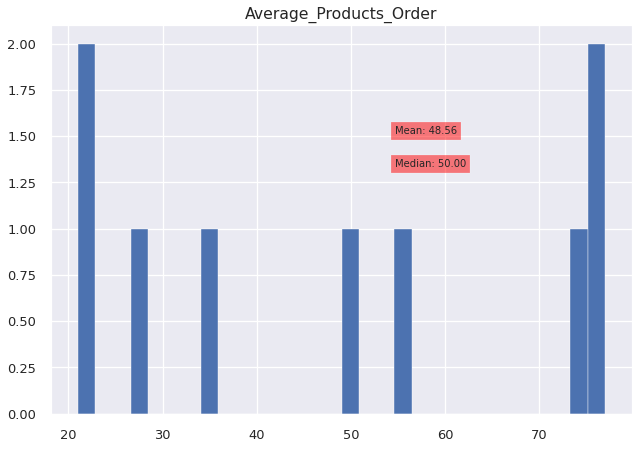

Cluster 0


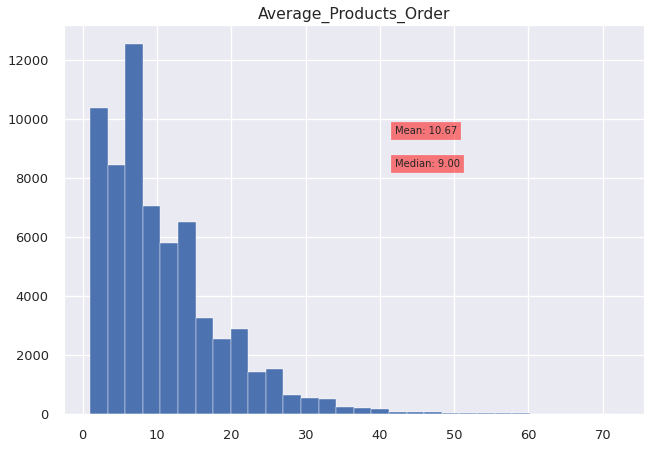

Cluster 1


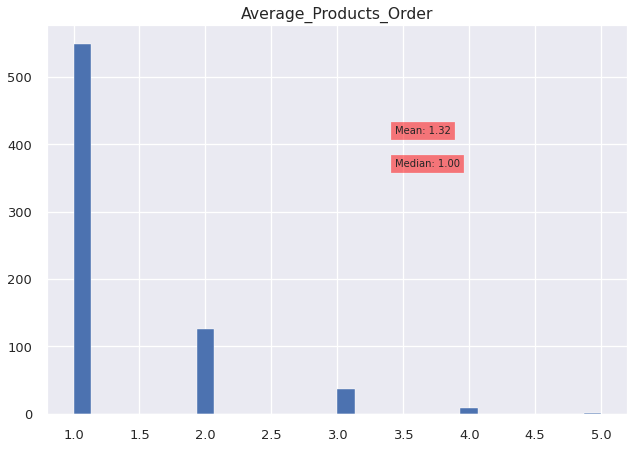

---------------------------------------------------------
count    65604.000000
mean         0.277746
std          0.206043
min          0.000000
25%          0.142857
50%          0.250000
75%          0.380952
max          1.000000
Name: Fruits & Vegs, dtype: float64
Cluster -1


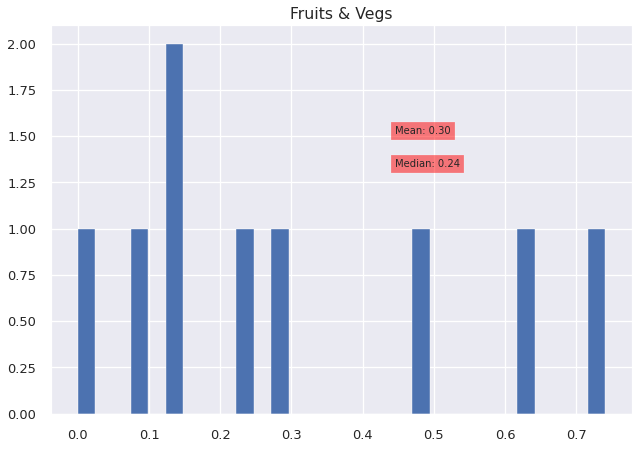

Cluster 0


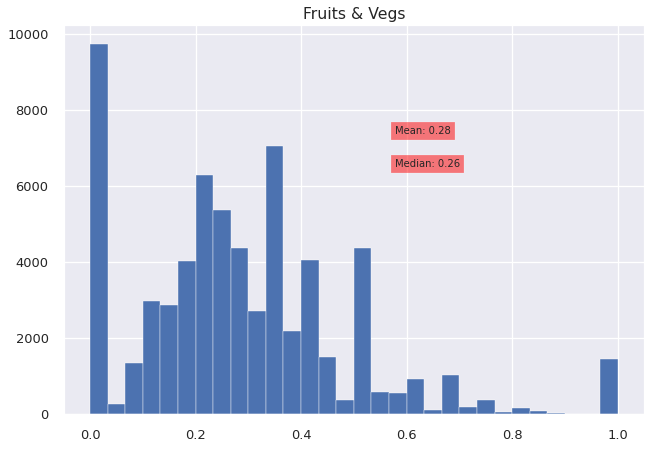

Cluster 1


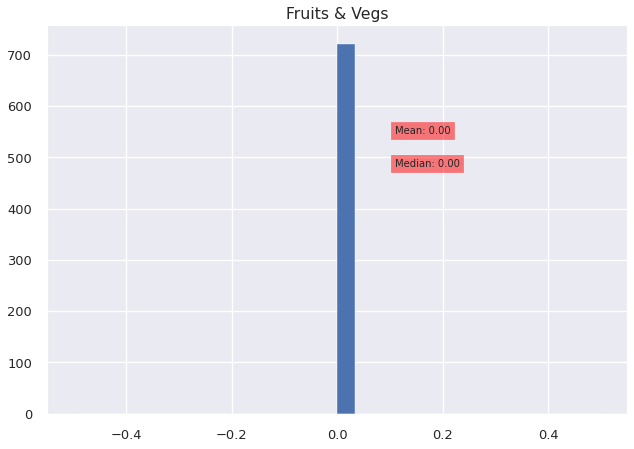

---------------------------------------------------------
count    65604.000000
mean         0.183603
std          0.176119
min          0.000000
25%          0.000000
50%          0.166667
75%          0.280000
max          1.000000
Name: Vegs & Fruits, dtype: float64
Cluster -1


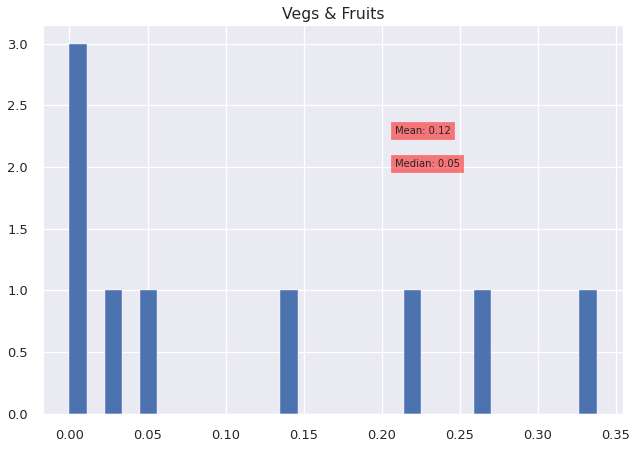

Cluster 0


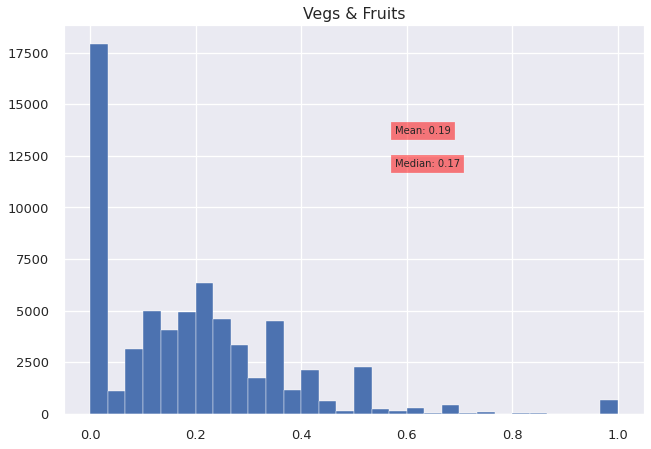

Cluster 1


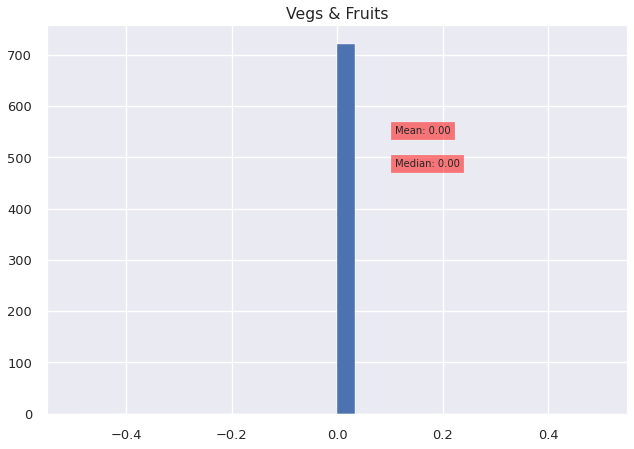

---------------------------------------------------------
count    65604.000000
mean         0.161742
std          0.166312
min          0.000000
25%          0.000000
50%          0.142857
75%          0.250000
max          1.000000
Name: Yogurt & Fruits, dtype: float64
Cluster -1


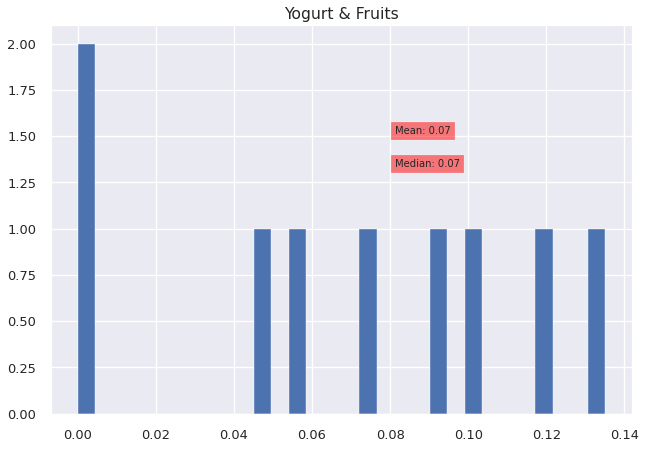

Cluster 0


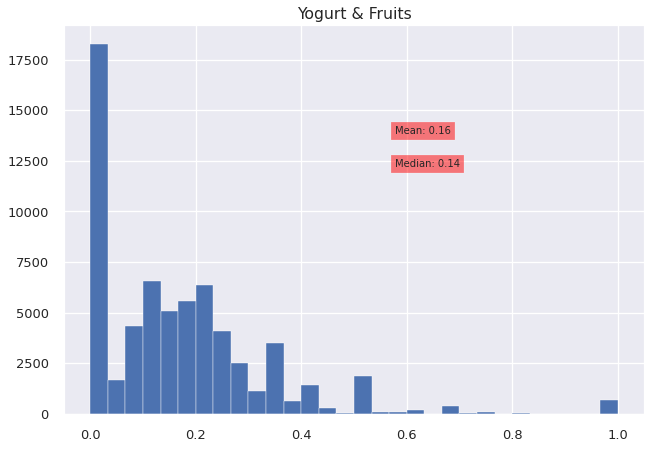

Cluster 1


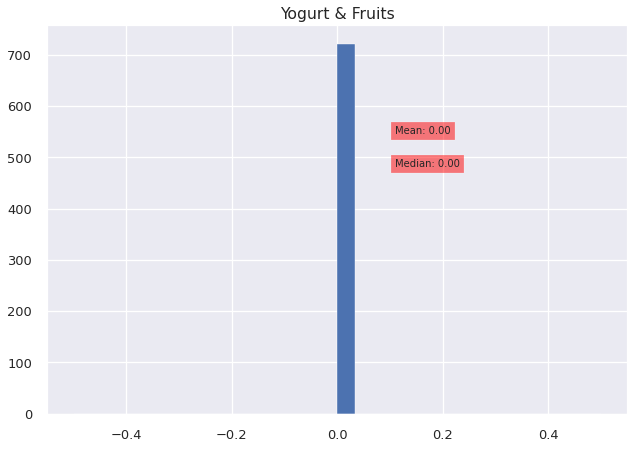

---------------------------------------------------------
count    65604.000000
mean         0.175215
std          0.169889
min          0.000000
25%          0.000000
50%          0.153846
75%          0.250000
max          1.000000
Name: Cheese & Soy, dtype: float64
Cluster -1


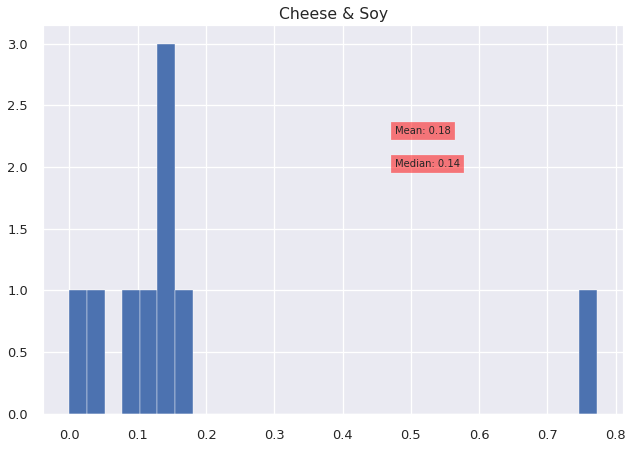

Cluster 0


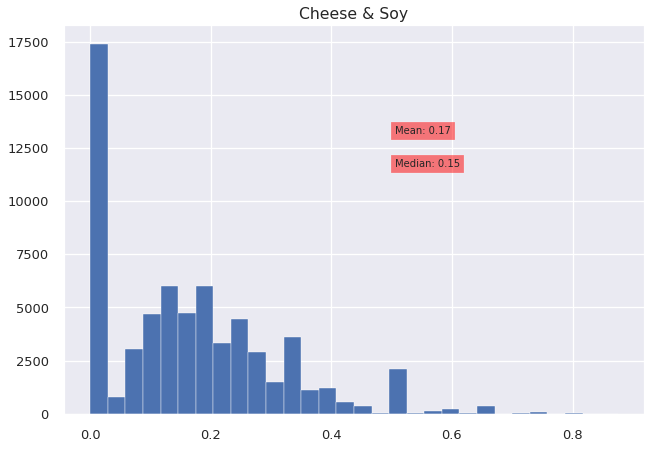

Cluster 1


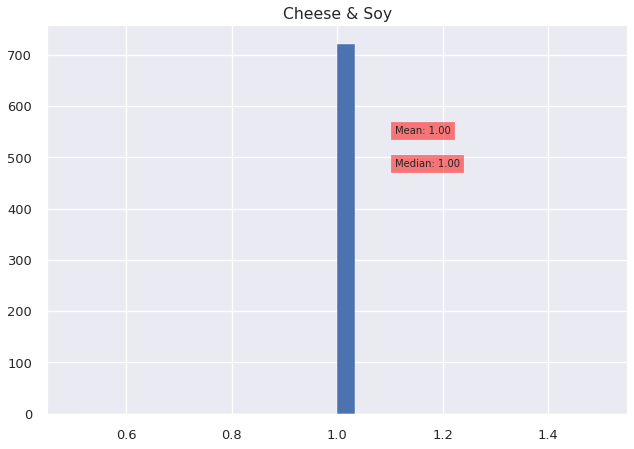

---------------------------------------------------------
count    65604.000000
mean         0.201693
std          0.190022
min          0.000000
25%          0.071429
50%          0.166667
75%          0.285714
max          1.000000
Name: Fruits & Water, dtype: float64
Cluster -1


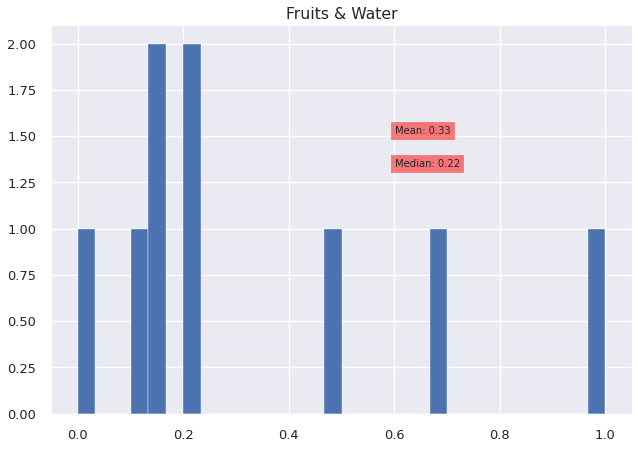

Cluster 0


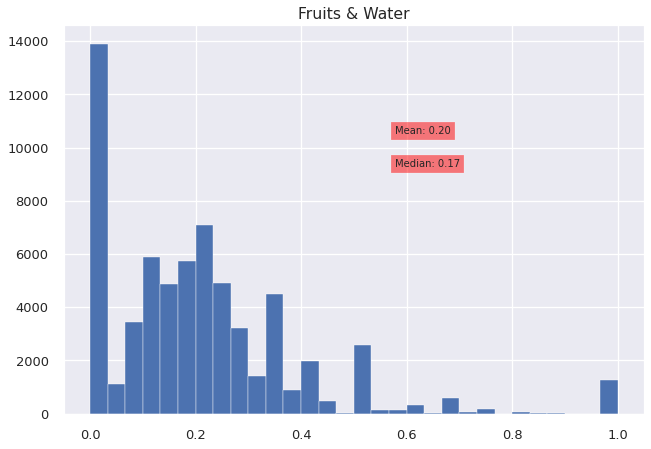

Cluster 1


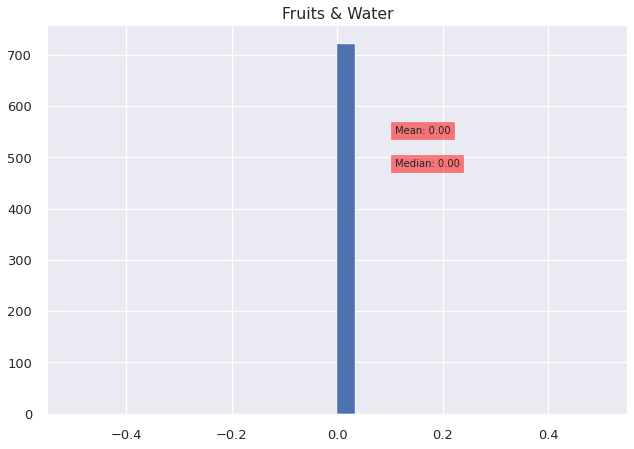

---------------------------------------------------------


In [49]:
hist_dbscan_clusters(1.0, 10)

In [50]:
df_dbscan_clusters(1.0, 10)

,A/Number_Of_Customers,B/Count_Orders,C/Average_Products_Order,D/Fruits & Vegs,E/Vegs & Fruits,F/Yogurt & Fruits,G/Cheese & Soy,H/Fruits & Water
-1,9,0.00 %,359.17 %,9.67 %,-37.30 %,-57.42 %,1.87 %,65.07 %
0,64873,0.00 %,0.92 %,1.11 %,1.12 %,1.12 %,-5.24 %,1.10 %
1,722,0.00 %,-87.56 %,-100.00 %,-100.00 %,-100.00 %,470.73 %,-100.00 %


In [51]:
# Adding a column in the dataframe giving the cluster allocation for each consumer
# using KMeans(n_clusters=5) model 

model = KMeans(n_clusters=5, random_state=0).fit(df_standard)
idk = model.labels_

for id_cluster in range(model.n_clusters):
    df_customers.loc[np.where(idk == id_cluster)[0], 'Customer_Category_km5'] = id_cluster

In [52]:
# Adding a column in the dataframe giving the cluster allocation for each consumer
# using KMeans(n_clusters=7) model 

model = KMeans(n_clusters=7, random_state=0).fit(df_standard)
idk = model.labels_

for id_cluster in range(model.n_clusters):
    df_customers.loc[np.where(idk == id_cluster)[0], 'Customer_Category_km7'] = id_cluster

In [54]:
# Adding a column in the dataframe giving the cluster allocation for each consumer
# using DBSCAN(eps=1.0, min_samples=5) model 

dbsc = DBSCAN(eps=1.0, min_samples=5).fit(df_standard)
labels = dbsc.labels_
df_customers['Customer_Category_dbsc5'] = labels

In [55]:
# Adding a column in the dataframe giving the cluster allocation for each consumer
# using DBSCAN(eps=1.0, min_samples=10) model 

dbsc = DBSCAN(eps=1.0, min_samples=10).fit(df_standard)
labels = dbsc.labels_
df_customers['Customer_Category_dbsc10'] = labels

In [56]:
df_customers.head(10)

,Count_Orders,Average_Products_Order,Fruits & Vegs,Vegs & Fruits,Yogurt & Fruits,Cheese & Soy,Fruits & Water,Customer_Category_km5,Customer_Category_km7,Customer_Category_dbsc5,Customer_Category_dbsc10
0,1.0,11.0,0.181818,0.181818,0.272727,0.272727,0.090909,1.0,0.0,0,0
1,1.0,31.0,0.387097,0.193548,0.096774,0.193548,0.129032,1.0,4.0,0,0
2,1.0,9.0,0.222222,0.222222,0.111111,0.222222,0.222222,1.0,0.0,0,0
3,1.0,9.0,0.555556,0.111111,0.000000,0.111111,0.222222,2.0,6.0,0,0
4,1.0,18.0,0.222222,0.388889,0.111111,0.055556,0.222222,1.0,3.0,0,0
5,1.0,22.0,0.363636,0.090909,0.227273,0.136364,0.181818,1.0,4.0,0,0
6,1.0,4.0,0.000000,0.250000,0.000000,0.250000,0.500000,3.0,2.0,0,0
7,1.0,5.0,0.200000,0.200000,0.400000,0.200000,0.000000,4.0,1.0,0,0
8,1.0,11.0,0.090909,0.000000,0.363636,0.090909,0.454545,4.0,1.0,0,0
9,1.0,6.0,0.166667,0.333333,0.500000,0.000000,0.000000,4.0,1.0,0,0


In [57]:
# exporting your updated dataset
df_customers.to_csv("/content/drive/MyDrive/instacart/df_clustered.csv",encoding='utf-8', index=False)